![](https://media.tegna-media.com/assets/WNEP/images/c5383479-1ee1-43d8-84aa-680322a8a778/c5383479-1ee1-43d8-84aa-680322a8a778_1920x1080.jpg)

# Business Problem

- Predicting whether people have diabetes when their characteristics are specified to develop a machine learning model that is capable of learning from a machine learning model.

# Dataset Story

- The dataset is part of a larger dataset held at the National Institutes of Diabetes-Digestive-Kidney Diseases in the US. In the US
  Pima Indian women aged 21 years and older living in Phoenix, the 5th largest city in the State of Arizona
  are the data used for diabetes research.
  
- The target variable is specified as "outcome", where 1 indicates a positive diabetes test result and 0 indicates a negative result.

- **Pregnancies:** Number of pregnancies

- **Glucose:** 2-hour plasma glucose concentration in oral glucose tolerance test

- **Blood Pressure:** Blood Pressure (small blood pressure) (mm Hg)

- **SkinThickness:** Skin Thickness

- **Insulin:** 2-hour serum insulin (mu U/ml)

- **DiabetesPedigreeFunction:** Function (2-hour plasma glucose concentration in oral glucose tolerance test)

- **BMI:** Body mass index

- **Age:** Age (years)

- **Outcome:** Have the disease (1) or not (0)

# Road Map

- 1.Import Required Libraries
- 2.Adjusting Row Column Settings
- 3.Loading the data Set
- 4.Exploratory Data Analysis
- 5.Capturing / Detecting Numeric and Categorical Variables
- 6.Analysis of Categorical Variables
- 7.Analysis of Numerical Variables
- 8.Analysis of Categorical Variables by Target
- 9.Analysis of Numeric Variables by Target
- 10.Examining the Logarithm of the Dependent Variable
- 11.Correlation Analysis
- 12.The Relationship Between Variables
- 13.Base Model Before Feature Engineering
    - 13.1.RandomForestClassifier
    - 13.2.Logistic Regression
    - 13.3.K-Nearest Neighbors (KNN)
    - 13.4.Support Vector Classifier (SVC)
    - 13.5.Decision Tree Classifier
    - 13.6.AdaBoost Classifier
    - 13.7.Gradient Boosting Classifier
    - 13.8.XGBoost Classifier
    - 13.9.LightGBM Classifier
    - 13.10.Comparison of Metrics for Different Models
    - 13.11.Visualization of the Decision Tree
    - 13.12.Plot Importance of Variables According to Base Model
- 14.Feature Engineering
- 15.Missing Value Analysis
- 16.Outlier Analysis
- 17.Feature Extraction
- 18.Encoding
- 19.Standardization Process
- 20.Model Building
    - 20.1.RandomForestClassifier
    - 20.1.1.Random Forest Classifier Hyperparameter Optimization
    - 20.2.Logistic Regression
    - 20.2.1.Logistic Regression Hyperparameter Optimization
    - 20.3.K-Nearest Neighbors (KNN)
        - 20.3.1.K-Nearest Neighbors (KNN) Hyperparameter Optimization
    - 20.4.Support Vector Classifier (SVC)
        - 20.4.1.Support Vector Classifier (SVC) Hyperparameter Optimization
    - 20.5.Decision Tree Classifier
        - 20.5.1.Decision Tree Classifier Hyperparameter Optimization
    - 20.6.AdaBoost Classifier
        - 20.6.1.AdaBoost Classifier Hyperparameter Optimization
    - 20.7.Gradient Boosting Classifier
        - 20.7.1.Gradient Boosting Classifier Hyperparameter Optimization
    - 20.8.XGBoost Classifier Hyperparameter Optimization
    - 20.9.LightGBM Classifier
        - 20.9.1.LightGBM Classifier Hyperparameter Optimization
    - 20.10.Comparison of Metrics for Different Models After Feature Engineering
    - 20.11.Comparison of Metrics for Different Models After Hyperparameter Optimization
    - 20.12.Comparison of Metrics Before and After Hyperparameter Optimization

# 1. Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import itertools
import plotly.graph_objects as go

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.simplefilter(action="ignore")


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 2. Adjusting Row Column Settings

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# 3. Loading the data Set

In [3]:
df = pd.read_csv("/kaggle/input/diabetes-dataset/diabetes.csv")

# 4. Exploratory Data Analysis

In [4]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(768, 9)
##################### Types #####################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
##################### Head #####################
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0            6      148             72             35        0 33.600   
1            1       85             66             29        0 26.600   
2            8      183             64              0        0 23.300   
3            1       89             66             23       94 28.100   
4            0      137             40             35      168 43.100   

   DiabetesPedigreeFunction  Age  Outcome  
0                    

# 5. Capturing / Detecting Numeric and Categorical Variables

In [5]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
    Note Categorical variables include categorical variables with numeric appearance.

    Parameters
    ------
        dataframe: dataframe
                Variable names of the dataframe to be taken
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optinal
                class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of cardinal variables with categorical appearance

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 return lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"] 

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car] 

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"] 

    num_cols = [col for col in num_cols if col not in num_but_cat] 
    
    print(f"Observations: {dataframe.shape[0]}") # data frame in içerisindeki gözlem sayısına eriştik.
    print(f"Variables: {dataframe.shape[1]}") # data frame in içerisindeki değişken sayısına eriştik.
    print(f'cat_cols: {len(cat_cols)}') # kaçtane kategorik değişken olduğunu tespit ettik.
    print(f'num_cols: {len(num_cols)}') # kaç tane nümerik değişken olduğunu tespit ettik.
    print(f'cat_but_car: {len(cat_but_car)}') # kaç tane kardinal değişken olduğunu tespit ettik.
    print(f'num_but_cat: {len(num_but_cat)}') # kaç tane numerik gibi görünüp kategorik olan değişken olduğunu belirledi


    return cat_cols, num_cols, cat_but_car, num_but_cat

In [6]:
cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [7]:
cat_cols

['Outcome']

In [8]:
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [9]:
cat_but_car

[]

In [10]:
num_but_cat

['Outcome']

# 6. Analysis of Categorical Variables

In [11]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

   Outcome  Ratio
0      500 65.104
1      268 34.896
##########################################


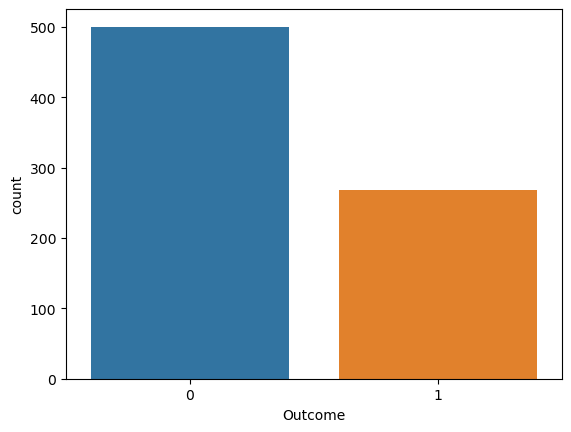

In [12]:
# We did it this way because there is only one categorical variable.

cat_summary(df, "Outcome", plot=True)

   Outcome  Ratio
0      500 65.104
1      268 34.896
##########################################


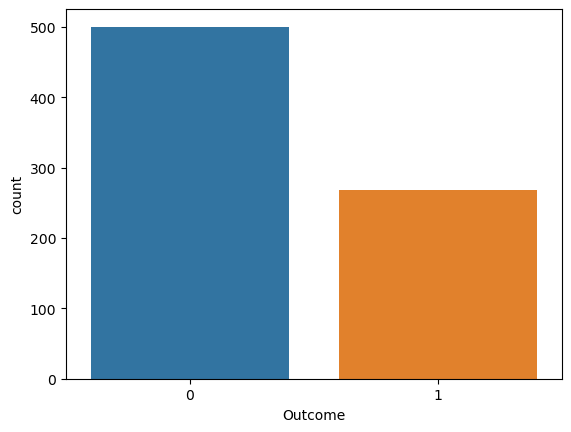

In [13]:
# If there were more than one categorical variable, we would loop through all categorical variables one by one as follows to run the function.

for col in cat_cols:
    cat_summary(df, col, plot=True)

# 7. Analysis of Numerical Variables

In [14]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

count   768.000
mean      3.845
std       3.370
min       0.000
5%        0.000
10%       0.000
20%       1.000
30%       1.000
40%       2.000
50%       3.000
60%       4.000
70%       5.000
80%       7.000
90%       9.000
95%      10.000
99%      13.000
max      17.000
Name: Pregnancies, dtype: float64


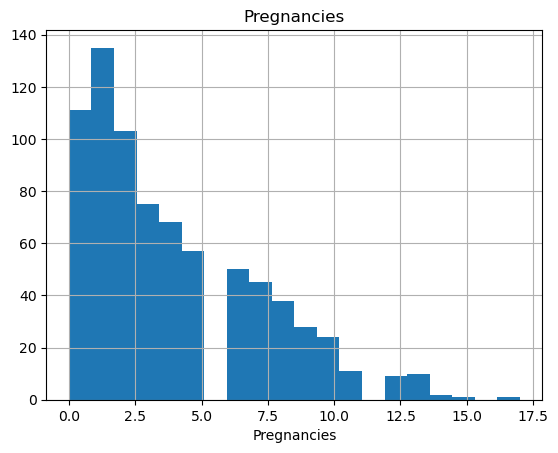

count   768.000
mean    120.895
std      31.973
min       0.000
5%       79.000
10%      85.000
20%      95.000
30%     102.000
40%     109.000
50%     117.000
60%     125.000
70%     134.000
80%     147.000
90%     167.000
95%     181.000
99%     196.000
max     199.000
Name: Glucose, dtype: float64


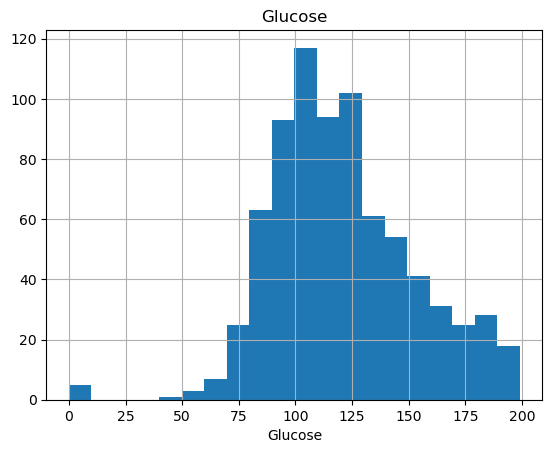

count   768.000
mean     69.105
std      19.356
min       0.000
5%       38.700
10%      54.000
20%      60.000
30%      64.000
40%      68.000
50%      72.000
60%      74.000
70%      78.000
80%      82.000
90%      88.000
95%      90.000
99%     106.000
max     122.000
Name: BloodPressure, dtype: float64


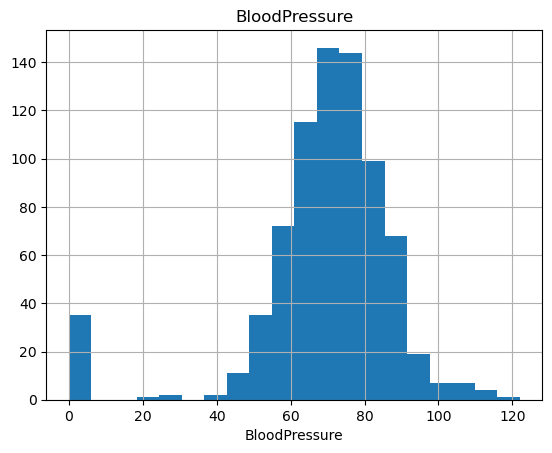

count   768.000
mean     20.536
std      15.952
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       8.200
40%      18.000
50%      23.000
60%      27.000
70%      31.000
80%      35.000
90%      40.000
95%      44.000
99%      51.330
max      99.000
Name: SkinThickness, dtype: float64


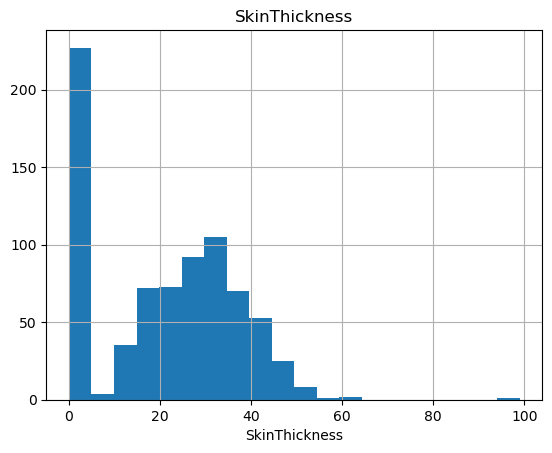

count   768.000
mean     79.799
std     115.244
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       0.000
50%      30.500
60%      72.200
70%     106.000
80%     150.000
90%     210.000
95%     293.000
99%     519.900
max     846.000
Name: Insulin, dtype: float64


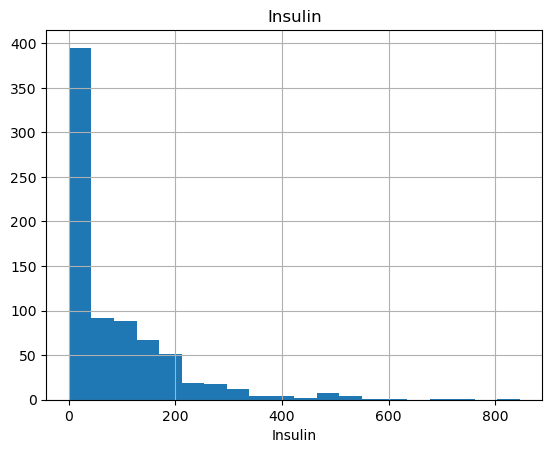

count   768.000
mean     31.993
std       7.884
min       0.000
5%       21.800
10%      23.600
20%      25.900
30%      28.200
40%      30.100
50%      32.000
60%      33.700
70%      35.490
80%      37.800
90%      41.500
95%      44.395
99%      50.759
max      67.100
Name: BMI, dtype: float64


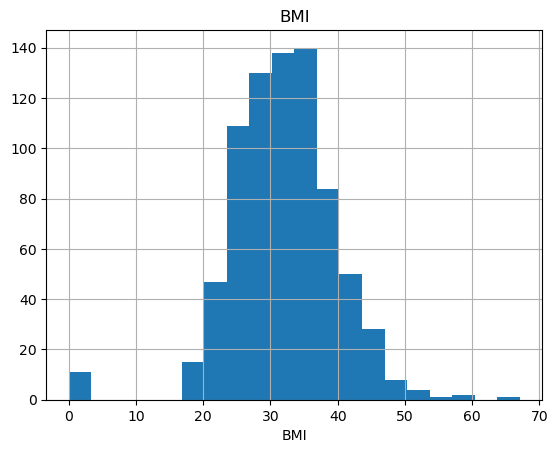

count   768.000
mean      0.472
std       0.331
min       0.078
5%        0.140
10%       0.165
20%       0.219
30%       0.259
40%       0.303
50%       0.372
60%       0.454
70%       0.564
80%       0.687
90%       0.879
95%       1.133
99%       1.698
max       2.420
Name: DiabetesPedigreeFunction, dtype: float64


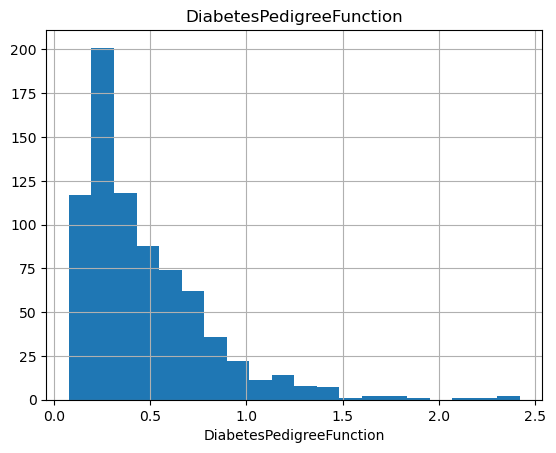

count   768.000
mean     33.241
std      11.760
min      21.000
5%       21.000
10%      22.000
20%      23.000
30%      25.000
40%      27.000
50%      29.000
60%      33.000
70%      38.000
80%      42.600
90%      51.000
95%      58.000
99%      67.000
max      81.000
Name: Age, dtype: float64


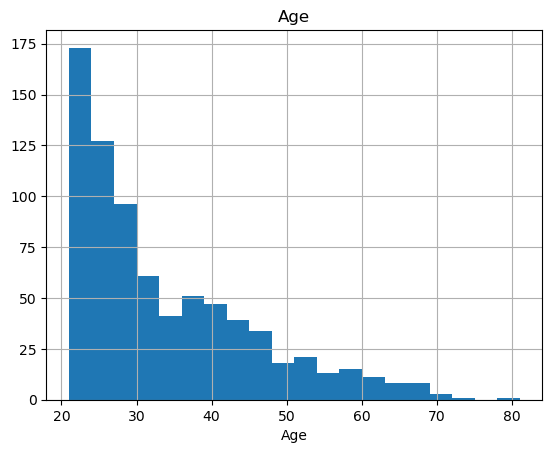

In [15]:
for col in num_cols:
    num_summary(df, col, plot=True)

# 8. Analysis of Categorical Variables by Target

In [16]:
def target_summary_with_cat(dataframe, target, categorical_col, plot=False):
    print(pd.DataFrame({'TARGET_MEAN': dataframe.groupby(categorical_col)[target].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=categorical_col, y=target, data=dataframe)
        plt.show(block=True)

         TARGET_MEAN
Outcome             
0              0.000
1              1.000




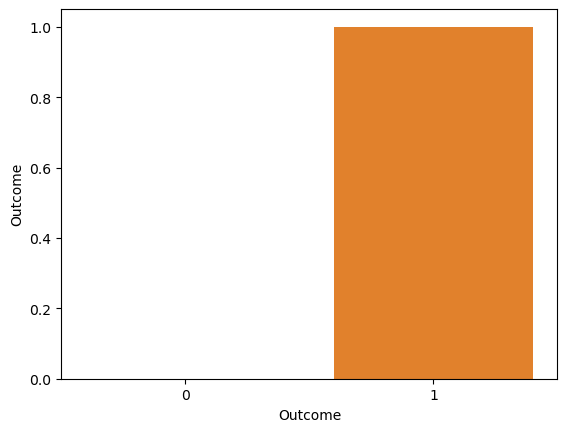

In [17]:
for col in cat_cols:
    target_summary_with_cat(df, "Outcome", col, plot=True)

# 9. Analysis of Numeric Variables by Target

In [18]:
def target_summary_with_num(dataframe, target, numerical_col, plot=False):
    print(pd.DataFrame({numerical_col+'_mean': dataframe.groupby(target)[numerical_col].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=target, y=numerical_col, data=dataframe)
        plt.show(block=True)

         Pregnancies_mean
Outcome                  
0                   3.298
1                   4.866




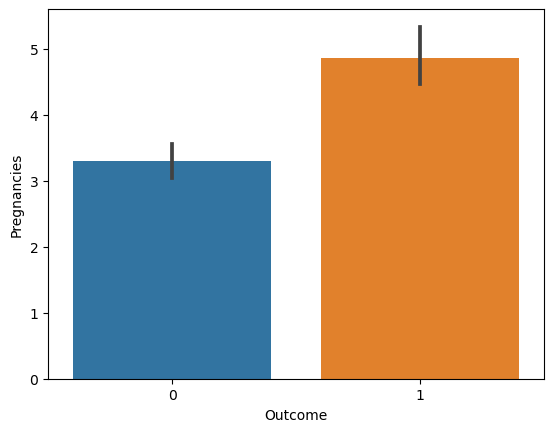

         Glucose_mean
Outcome              
0             109.980
1             141.257




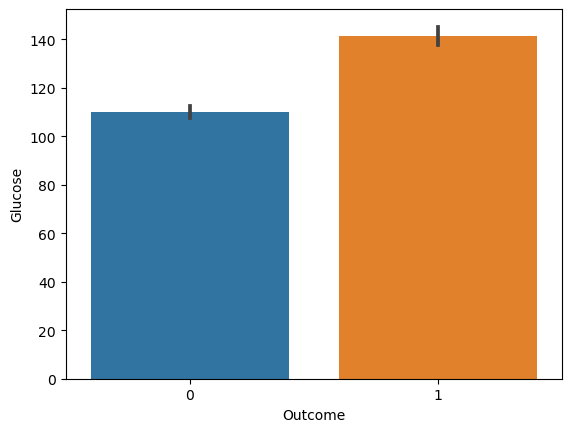

         BloodPressure_mean
Outcome                    
0                    68.184
1                    70.825




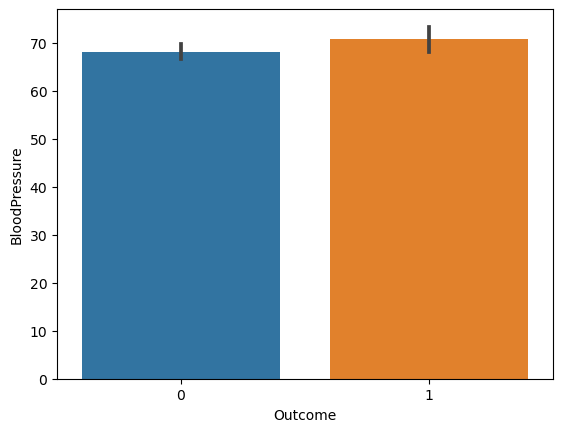

         SkinThickness_mean
Outcome                    
0                    19.664
1                    22.164




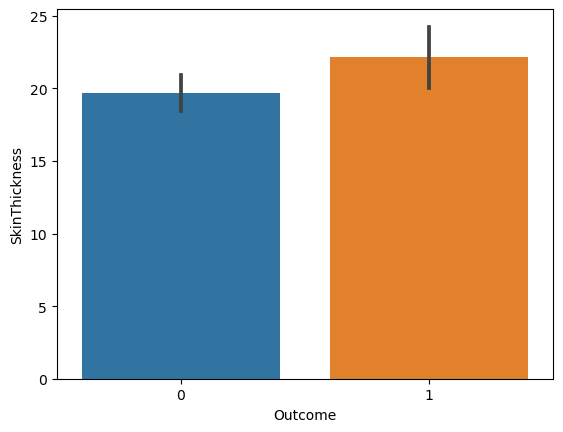

         Insulin_mean
Outcome              
0              68.792
1             100.336




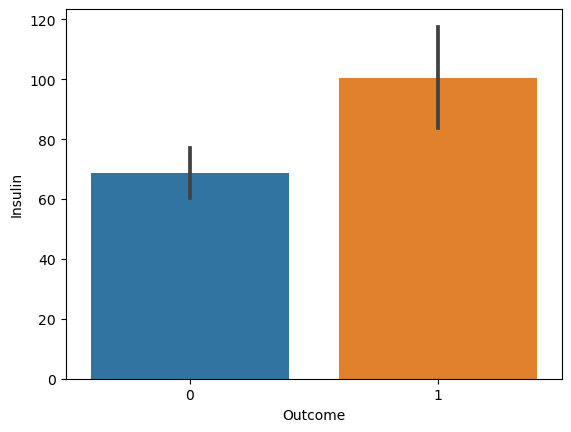

         BMI_mean
Outcome          
0          30.304
1          35.143




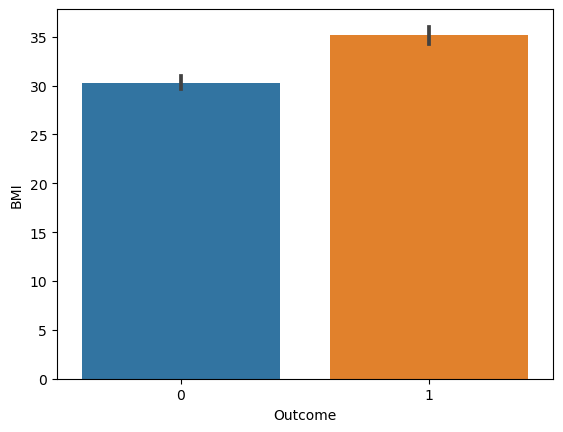

         DiabetesPedigreeFunction_mean
Outcome                               
0                                0.430
1                                0.550




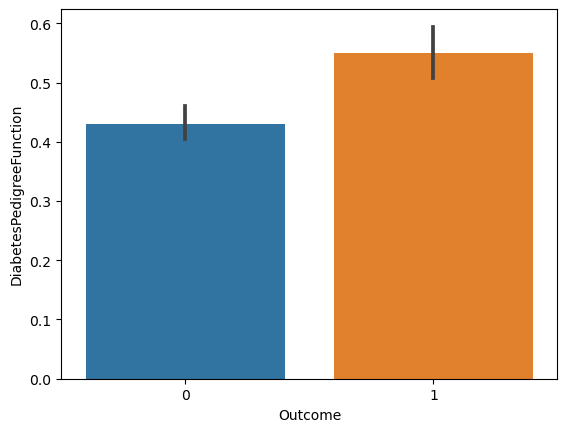

         Age_mean
Outcome          
0          31.190
1          37.067




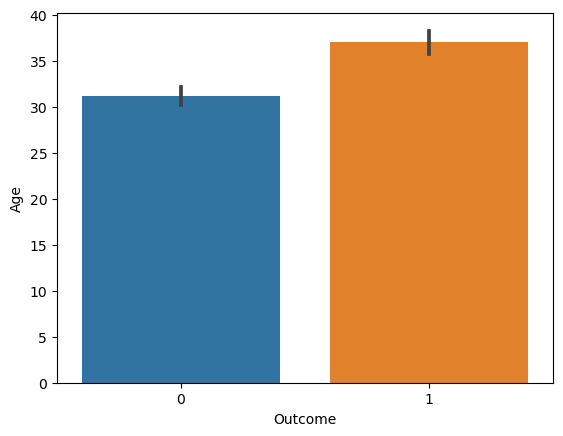

In [19]:
for col in num_cols:
    target_summary_with_num(df, "Outcome", col, plot=True)

# 10. Examining the Logarithm of the Dependent Variable

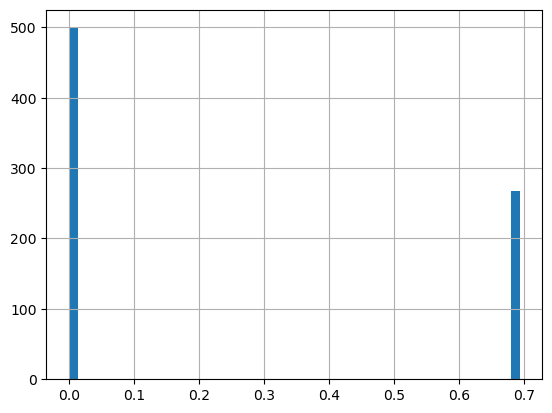

In [20]:
np.log1p(df["Outcome"]).hist(bins=50)
plt.show(block=True)

# 11. Correlation Analysis

In [21]:
corr = df[num_cols].corr()

In [22]:
corr

Pregnancies  Glucose  BloodPressure  SkinThickness  \
Pregnancies                     1.000    0.129          0.141         -0.082   
Glucose                         0.129    1.000          0.153          0.057   
BloodPressure                   0.141    0.153          1.000          0.207   
SkinThickness                  -0.082    0.057          0.207          1.000   
Insulin                        -0.074    0.331          0.089          0.437   
BMI                             0.018    0.221          0.282          0.393   
DiabetesPedigreeFunction       -0.034    0.137          0.041          0.184   
Age                             0.544    0.264          0.240         -0.114   

                          Insulin   BMI  DiabetesPedigreeFunction    Age  
Pregnancies                -0.074 0.018                    -0.034  0.544  
Glucose                     0.331 0.221                     0.137  0.264  
BloodPressure               0.089 0.282                     0.041  0.240  
SkinThickness               0.437 0.393                     0.184 -0.114  
Insulin                     1.000 0.198                     0.185 -0.042  
BMI                         0.198 1.000                     0.141  0.036  
DiabetesPedigreeFunction    0.185 0.141                     1.000  0.034  
Age                        -0.042 0.036                     0.034  1.000

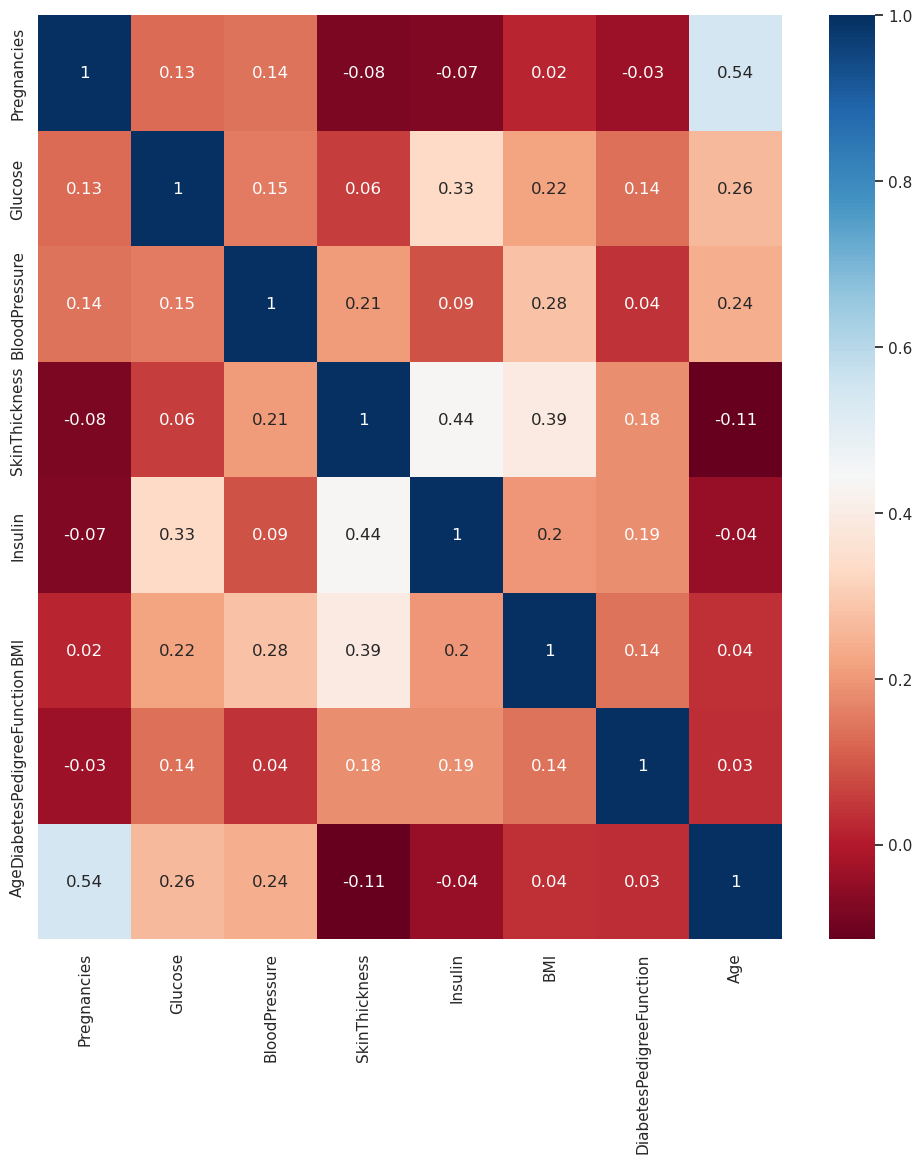

In [23]:
# Correlation heatmap without using functions

sns.set(rc={"figure.figsize": (12, 12)})
corr_values = corr.round(2)
sns.heatmap(corr, cmap="RdBu", annot=corr_values)
plt.show(block=True)

In [24]:
# Creation of correlation heat map using the function

def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={"figure.figsize": (12, 12)})
        corr_values = corr.round(2)
        sns.heatmap(corr, cmap="RdBu", annot=corr_values)
        plt.show(block=True)
    return drop_list

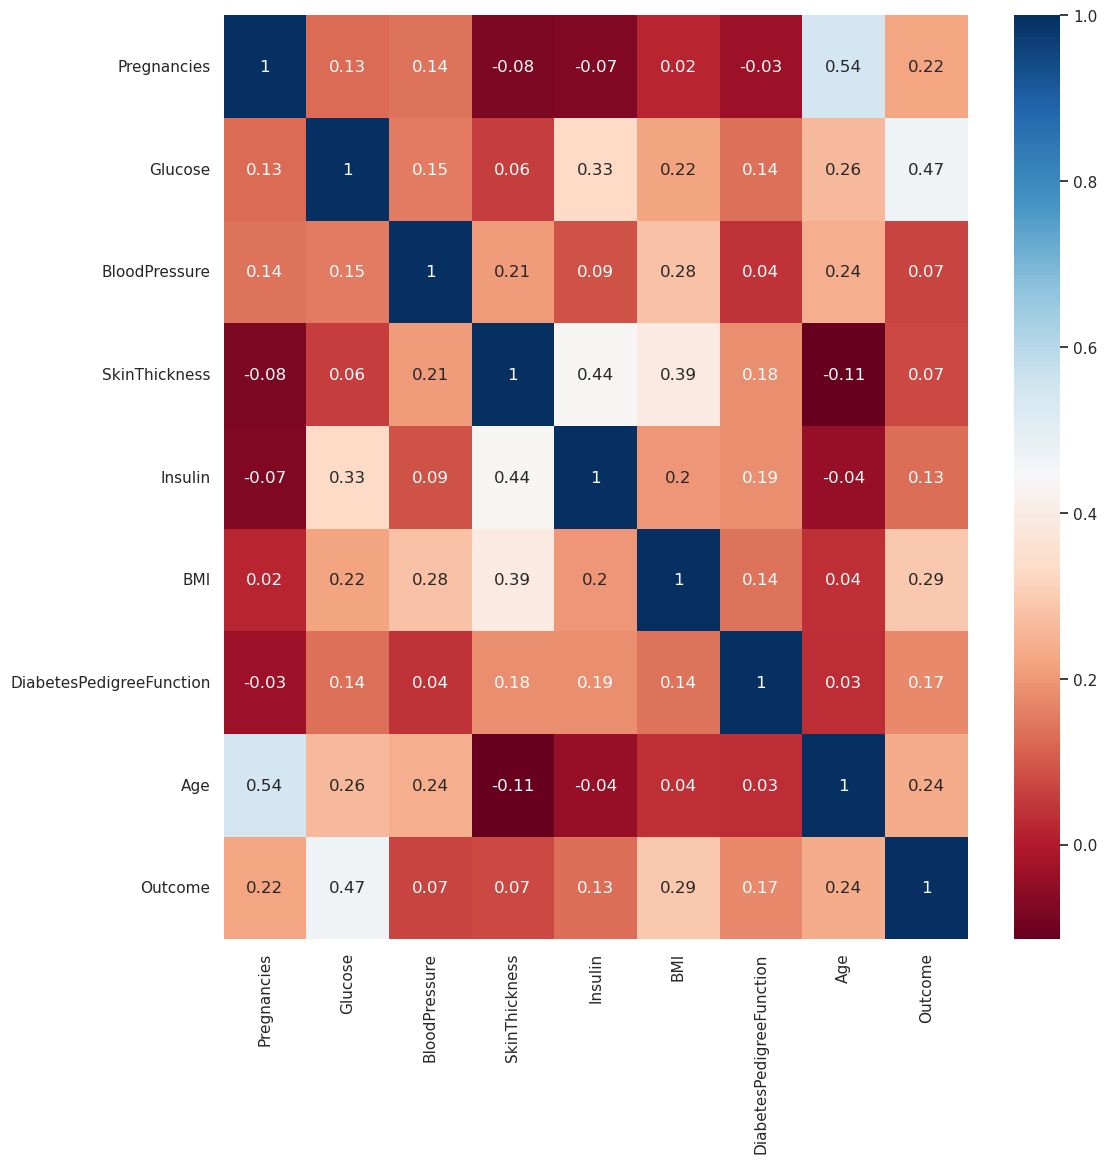

[]

In [25]:
high_correlated_cols(df, plot=True)

# 12. The Relationship Between Variables

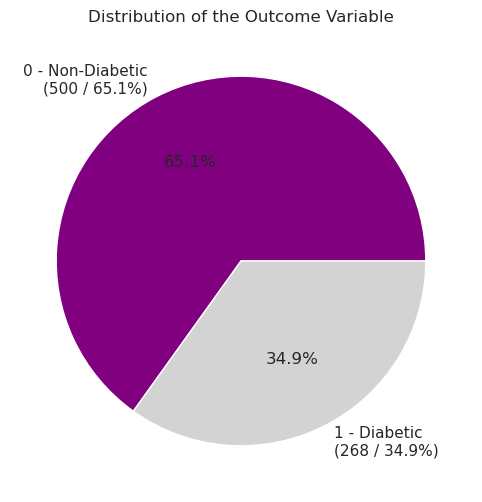

In [26]:
# Calculate the counts of each outcome
outcome_counts = df['Outcome'].value_counts()

# Calculate the total number of patients
total_patients = outcome_counts.sum()

# Calculate the percentages
percentages = outcome_counts / total_patients * 100

# Create labels with both quantity and percentage
labels = [f'0 - Non-Diabetic\n({outcome_counts[0]} / {percentages[0]:.1f}%)',
          f'1 - Diabetic\n({outcome_counts[1]} / {percentages[1]:.1f}%)']

# Plot the pie chart with labels and percentages
plt.figure(figsize=(8, 6))
plt.pie(outcome_counts, labels=labels, autopct='%1.1f%%', colors=['purple', 'lightgray'])
plt.title('Distribution of the Outcome Variable')
plt.show()


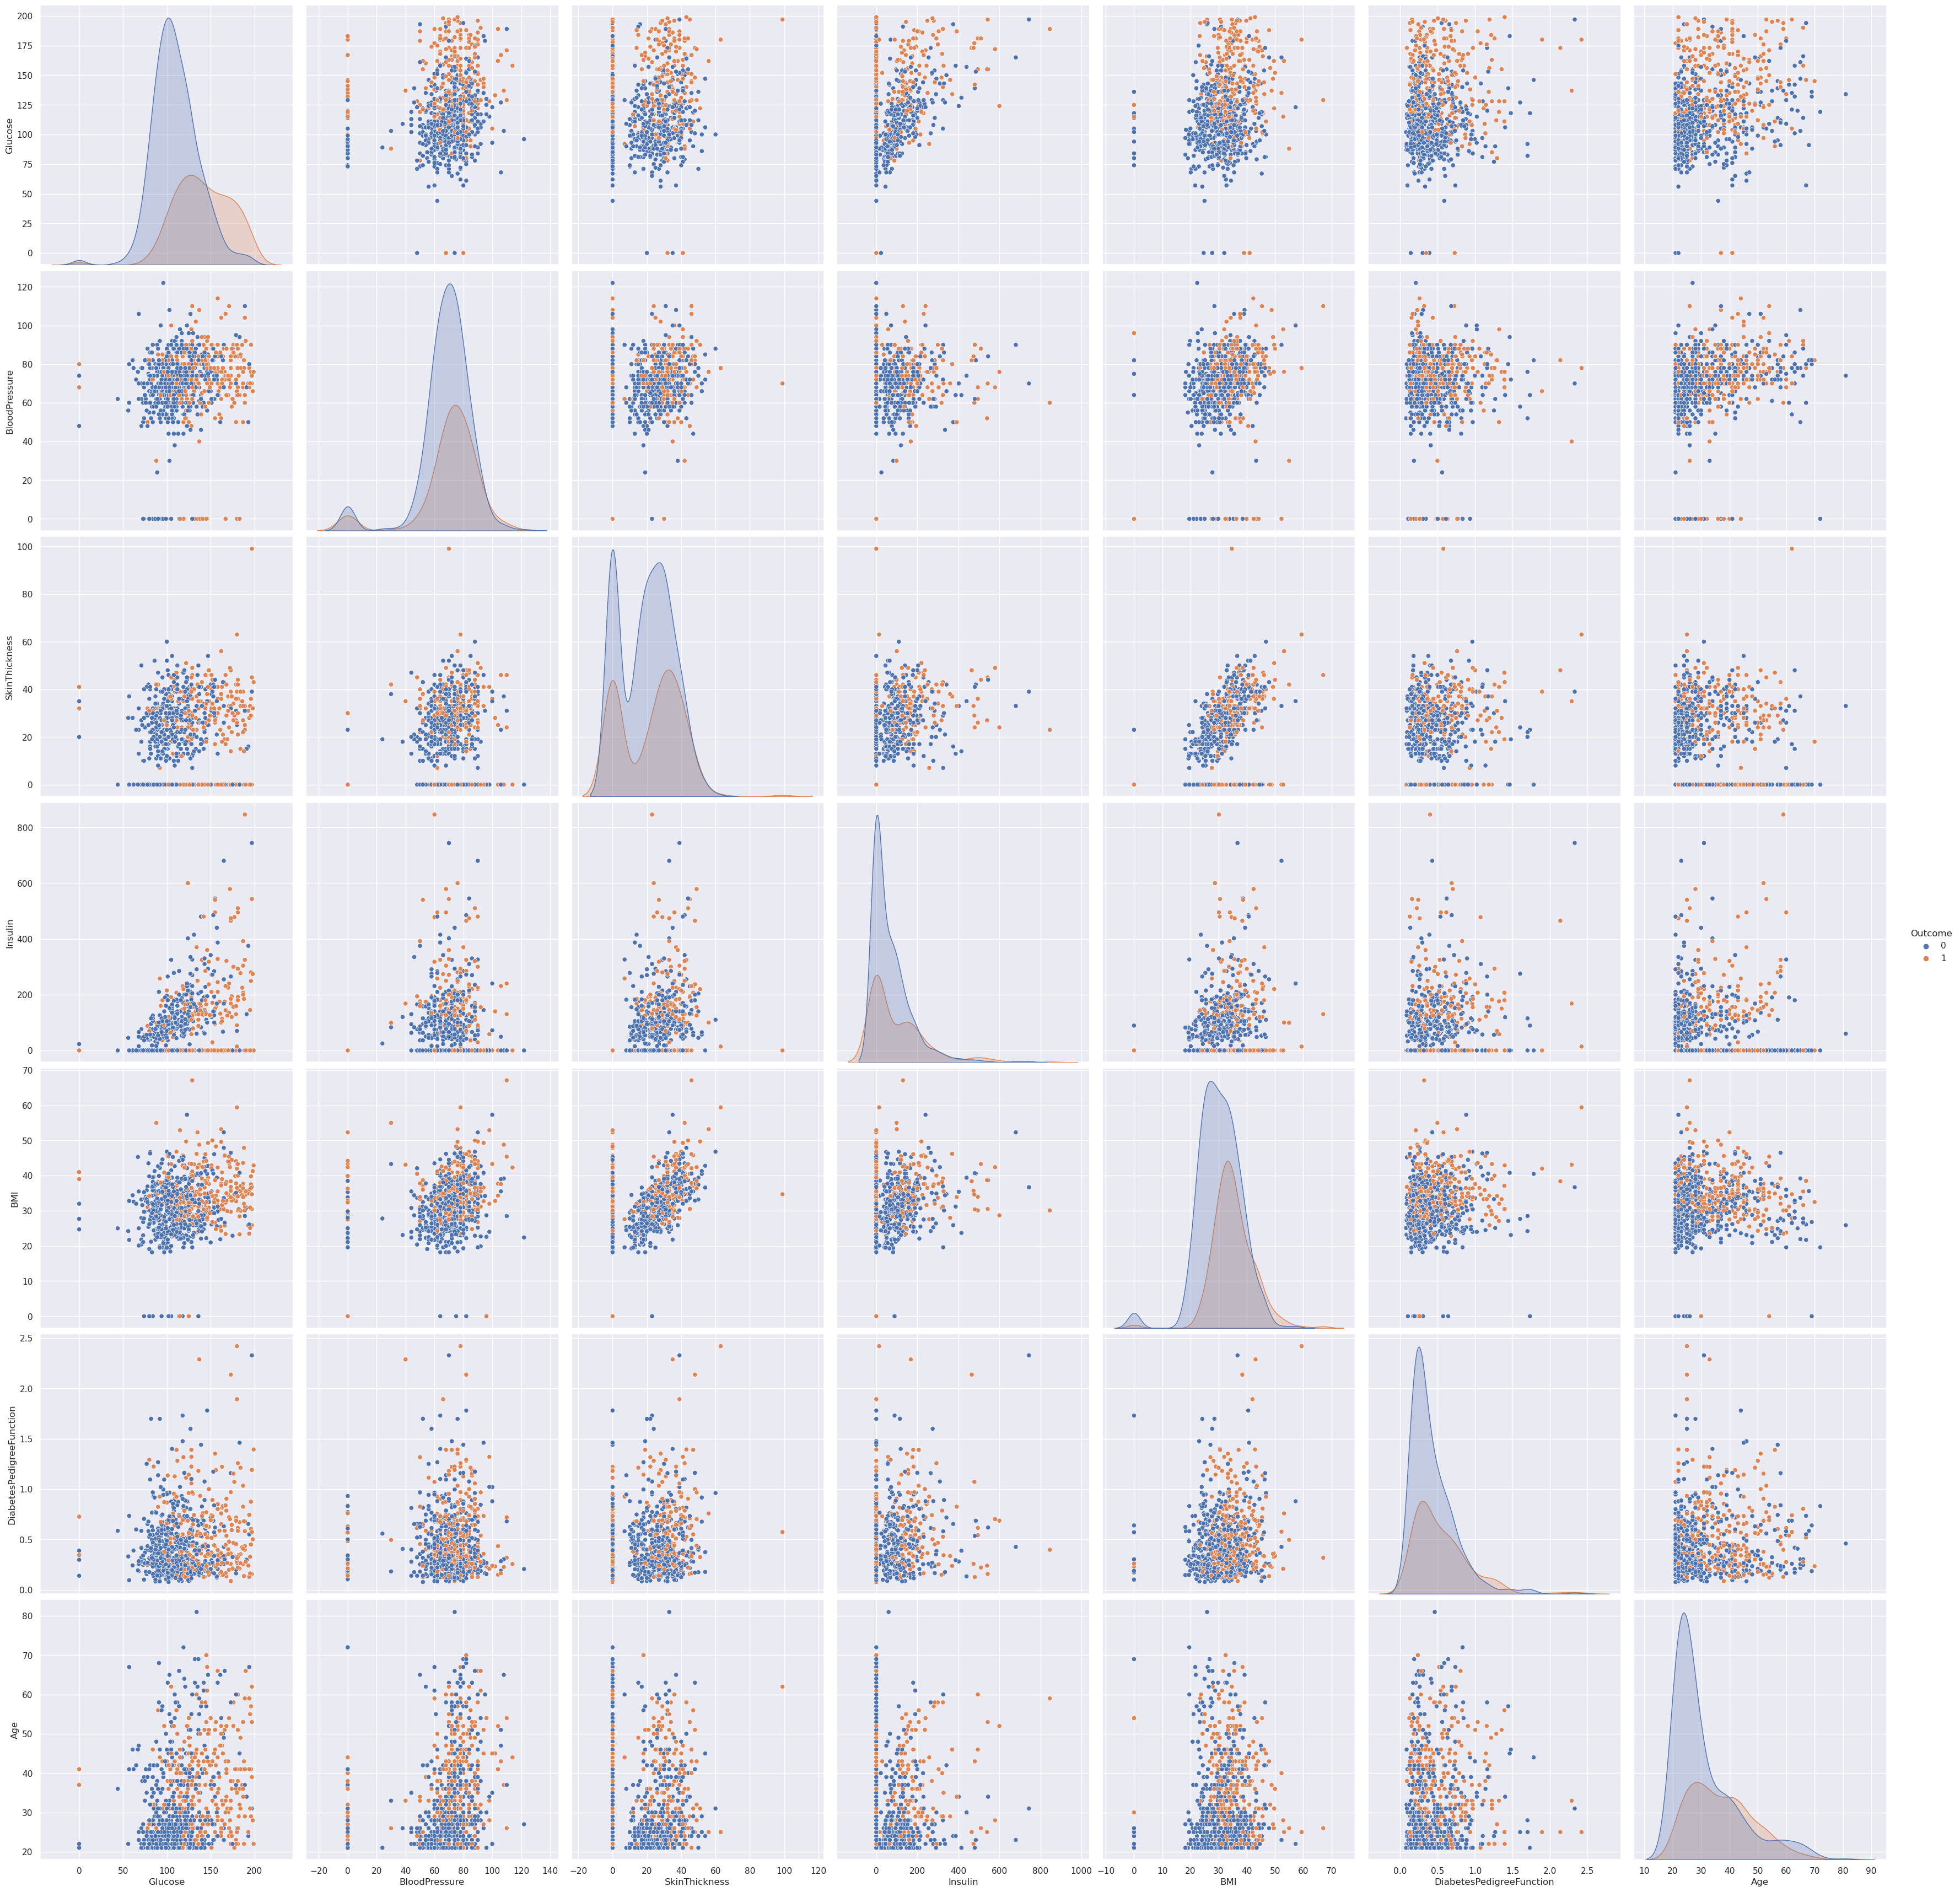

In [27]:
sns.pairplot(data=df, vars=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], hue='Outcome', height=5)
plt.show(block=True)

In [28]:
# Create combinations of binary categorical variables
feature_combinations = list(itertools.combinations(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], 2))

# Create a separate Bubble Chart for each binary categorical variable
for i, (feature1, feature2) in enumerate(feature_combinations):
    fig = px.scatter(df, x=feature1, y=feature2, color='Outcome', size='BMI',
                     title=f'{feature1} vs {feature2} Bubble Chart')

    fig.show(block=True)

# 13. Base Model Before Feature Engineering

In [29]:
# Creating the Dependent Variable.

y = df["Outcome"]

# Creating Independent Variables.

X = df.drop("Outcome", axis=1)

# Splitting the Data into Training and Test Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

# 13.1.RandomForestClassifier

In [30]:
# Random Forest Classifier Model Training

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)

# Prediction using Random Forest Classifier Model

y_pred = rf_model.predict(X_test)

print("RandomForestClassifier:")
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(y_pred,y_test),4)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 4)}")
print(f"F1: {round(f1_score(y_pred,y_test), 4)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 4)}")

RandomForestClassifier:
Accuracy: 0.7706
Recall: 0.7059
Precision: 0.5926
F1: 0.6443
Auc: 0.7517


# 13.2.Logistic Regression

In [31]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print("Logistic Regression:")
print(f"Accuracy: {round(accuracy_score(lr_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(lr_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(lr_pred, y_test), 4)}")
print(f"F1: {round(f1_score(lr_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(lr_pred, y_test), 4)}")


Logistic Regression:
Accuracy: 0.7879
Recall: 0.7667
Precision: 0.5679
F1: 0.6525
AUC: 0.781


# 13.3.K-Nearest Neighbors (KNN)

In [32]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

print("K-Nearest Neighbors (KNN):")
print(f"Accuracy: {round(accuracy_score(knn_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(knn_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(knn_pred, y_test), 4)}")
print(f"F1: {round(f1_score(knn_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(knn_pred, y_test), 4)}")


K-Nearest Neighbors (KNN):
Accuracy: 0.7619
Recall: 0.6711
Precision: 0.6296
F1: 0.6497
AUC: 0.7388


# 13.4.Support Vector Classifier (SVC)

In [33]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)

print("Support Vector Classifier (SVC):")
print(f"Accuracy: {round(accuracy_score(svc_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(svc_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(svc_pred, y_test), 4)}")
print(f"F1: {round(f1_score(svc_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(svc_pred, y_test), 4)}")


Support Vector Classifier (SVC):
Accuracy: 0.7446
Recall: 0.6833
Precision: 0.5062
F1: 0.5816
AUC: 0.7247


# 13.5.Decision Tree Classifier

In [34]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print("Decision Tree Classifier:")
print(f"Accuracy: {round(accuracy_score(dt_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(dt_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(dt_pred, y_test), 4)}")
print(f"F1: {round(f1_score(dt_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(dt_pred, y_test), 4)}")


Decision Tree Classifier:
Accuracy: 0.7273
Recall: 0.6154
Precision: 0.5926
F1: 0.6038
AUC: 0.6998


# 13.6.AdaBoost Classifier

In [35]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)

print("AdaBoost Classifier:")
print(f"Accuracy: {round(accuracy_score(ada_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(ada_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(ada_pred, y_test), 4)}")
print(f"F1: {round(f1_score(ada_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(ada_pred, y_test), 4)}")


AdaBoost Classifier:
Accuracy: 0.7532
Recall: 0.6765
Precision: 0.5679
F1: 0.6174
AUC: 0.7309


# 13.7.Gradient Boosting Classifier

In [36]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

print("Gradient Boosting Classifier:")
print(f"Accuracy: {round(accuracy_score(gb_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(gb_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(gb_pred, y_test), 4)}")
print(f"F1: {round(f1_score(gb_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(gb_pred, y_test), 4)}")


Gradient Boosting Classifier:
Accuracy: 0.7749
Recall: 0.6933
Precision: 0.642
F1: 0.6667
AUC: 0.7537


# 13.8.XGBoost Classifier

In [37]:
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

print("XGBoost Classifier:")
print(f"Accuracy: {round(accuracy_score(xgb_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(xgb_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(xgb_pred, y_test), 4)}")
print(f"F1: {round(f1_score(xgb_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(xgb_pred, y_test), 4)}")


XGBoost Classifier:
Accuracy: 0.7706
Recall: 0.7059
Precision: 0.5926
F1: 0.6443
AUC: 0.7517


# 13.9.LightGBM Classifier

In [38]:
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)

print("LightGBM Classifier:")
print(f"Accuracy: {round(accuracy_score(lgbm_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(lgbm_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(lgbm_pred, y_test), 4)}")
print(f"F1: {round(f1_score(lgbm_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(lgbm_pred, y_test), 4)}")


LightGBM Classifier:
Accuracy: 0.7619
Recall: 0.6857
Precision: 0.5926
F1: 0.6358
AUC: 0.7404


# 13.10.Comparison of Metrics for Different Models

In [39]:
# Dictionary containing the metric results
metrics = {
    "Model": ["Random Forest", "Logistic Regression", "KNN", "SVC", "Decision Tree", "AdaBoost", "Gradient Boosting", "XGBoost", "LightGBM"],
    "Accuracy": [0.7706, 0.7879, 0.7619, 0.7446, 0.7186, 0.7532, 0.7706, 0.7706, 0.7619],
    "Recall": [0.7059, 0.7667, 0.6711, 0.6833, 0.6053, 0.6765, 0.7, 0.7059, 0.6857],
    "Precision": [0.5926, 0.5679, 0.6296, 0.5062, 0.5679, 0.5679, 0.6049, 0.5926, 0.5926],
    "F1": [0.6443, 0.6525, 0.6497, 0.5816, 0.586, 0.6174, 0.649, 0.6443, 0.6358],
    "AUC": [0.7517, 0.781, 0.7388, 0.7247, 0.6897, 0.7309, 0.7506, 0.7517, 0.7404]
}

# Creating a DataFrame from the metrics dictionary
results_df = pd.DataFrame(metrics)

# Sorting the DataFrame by accuracy in descending order
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Creating the figure for the graph
fig = go.Figure()

# Colors for the metrics
colors = ["purple", "green", "blue", "orange", "red"]

# Adding traces for each metric in the specified order
for metric, color in zip(["Accuracy", "Recall", "Precision", "F1", "AUC"], colors):
    fig.add_trace(go.Bar(
        x=results_df["Model"],
        y=results_df[metric],
        marker_color=color,
        name=metric,
        text=results_df[metric],
        textposition='auto'
    ))

# Setting axis labels and title
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Metric Score",
    title="Comparison of Metrics for Different Models"
)

# Displaying the graph
fig.show(block=True)




**Conclusion**

**Accuracy:** Accuracy represents the overall correctness rate of the model's predictions. It indicates the proportion of correctly classified cases out of the total data.

**Recall:** Recall measures the proportion of actual diabetic cases that are correctly identified by the model. It shows how well the model captures the true positive cases of diabetes.

**Precision:** Precision calculates the proportion of predicted diabetic cases that are actually true positive cases. It indicates the accuracy of the model's positive predictions for diabetes.

**F1 Score:** F1 score is the harmonic mean of recall and precision. It provides a balanced measure by considering both recall and precision equally, evaluating the overall performance of the model.

**AUC (Area Under the Curve):** AUC represents the area under the Receiver Operating Characteristic (ROC) curve. It reflects the model's ability to distinguish between classes and provides an overall measure of performance.

# 13.11.Visualization of the Decision Tree

|--- feature_1 <= 129.50
|   |--- feature_5 <= 26.30
|   |   |--- feature_5 <= 9.10
|   |   |   |--- class: 0
|   |   |--- feature_5 >  9.10
|   |   |   |--- class: 0
|   |--- feature_5 >  26.30
|   |   |--- feature_7 <= 27.50
|   |   |   |--- class: 0
|   |   |--- feature_7 >  27.50
|   |   |   |--- class: 0
|--- feature_1 >  129.50
|   |--- feature_5 <= 27.85
|   |   |--- feature_1 <= 145.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  145.50
|   |   |   |--- class: 0
|   |--- feature_5 >  27.85
|   |   |--- feature_1 <= 158.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  158.50
|   |   |   |--- class: 1



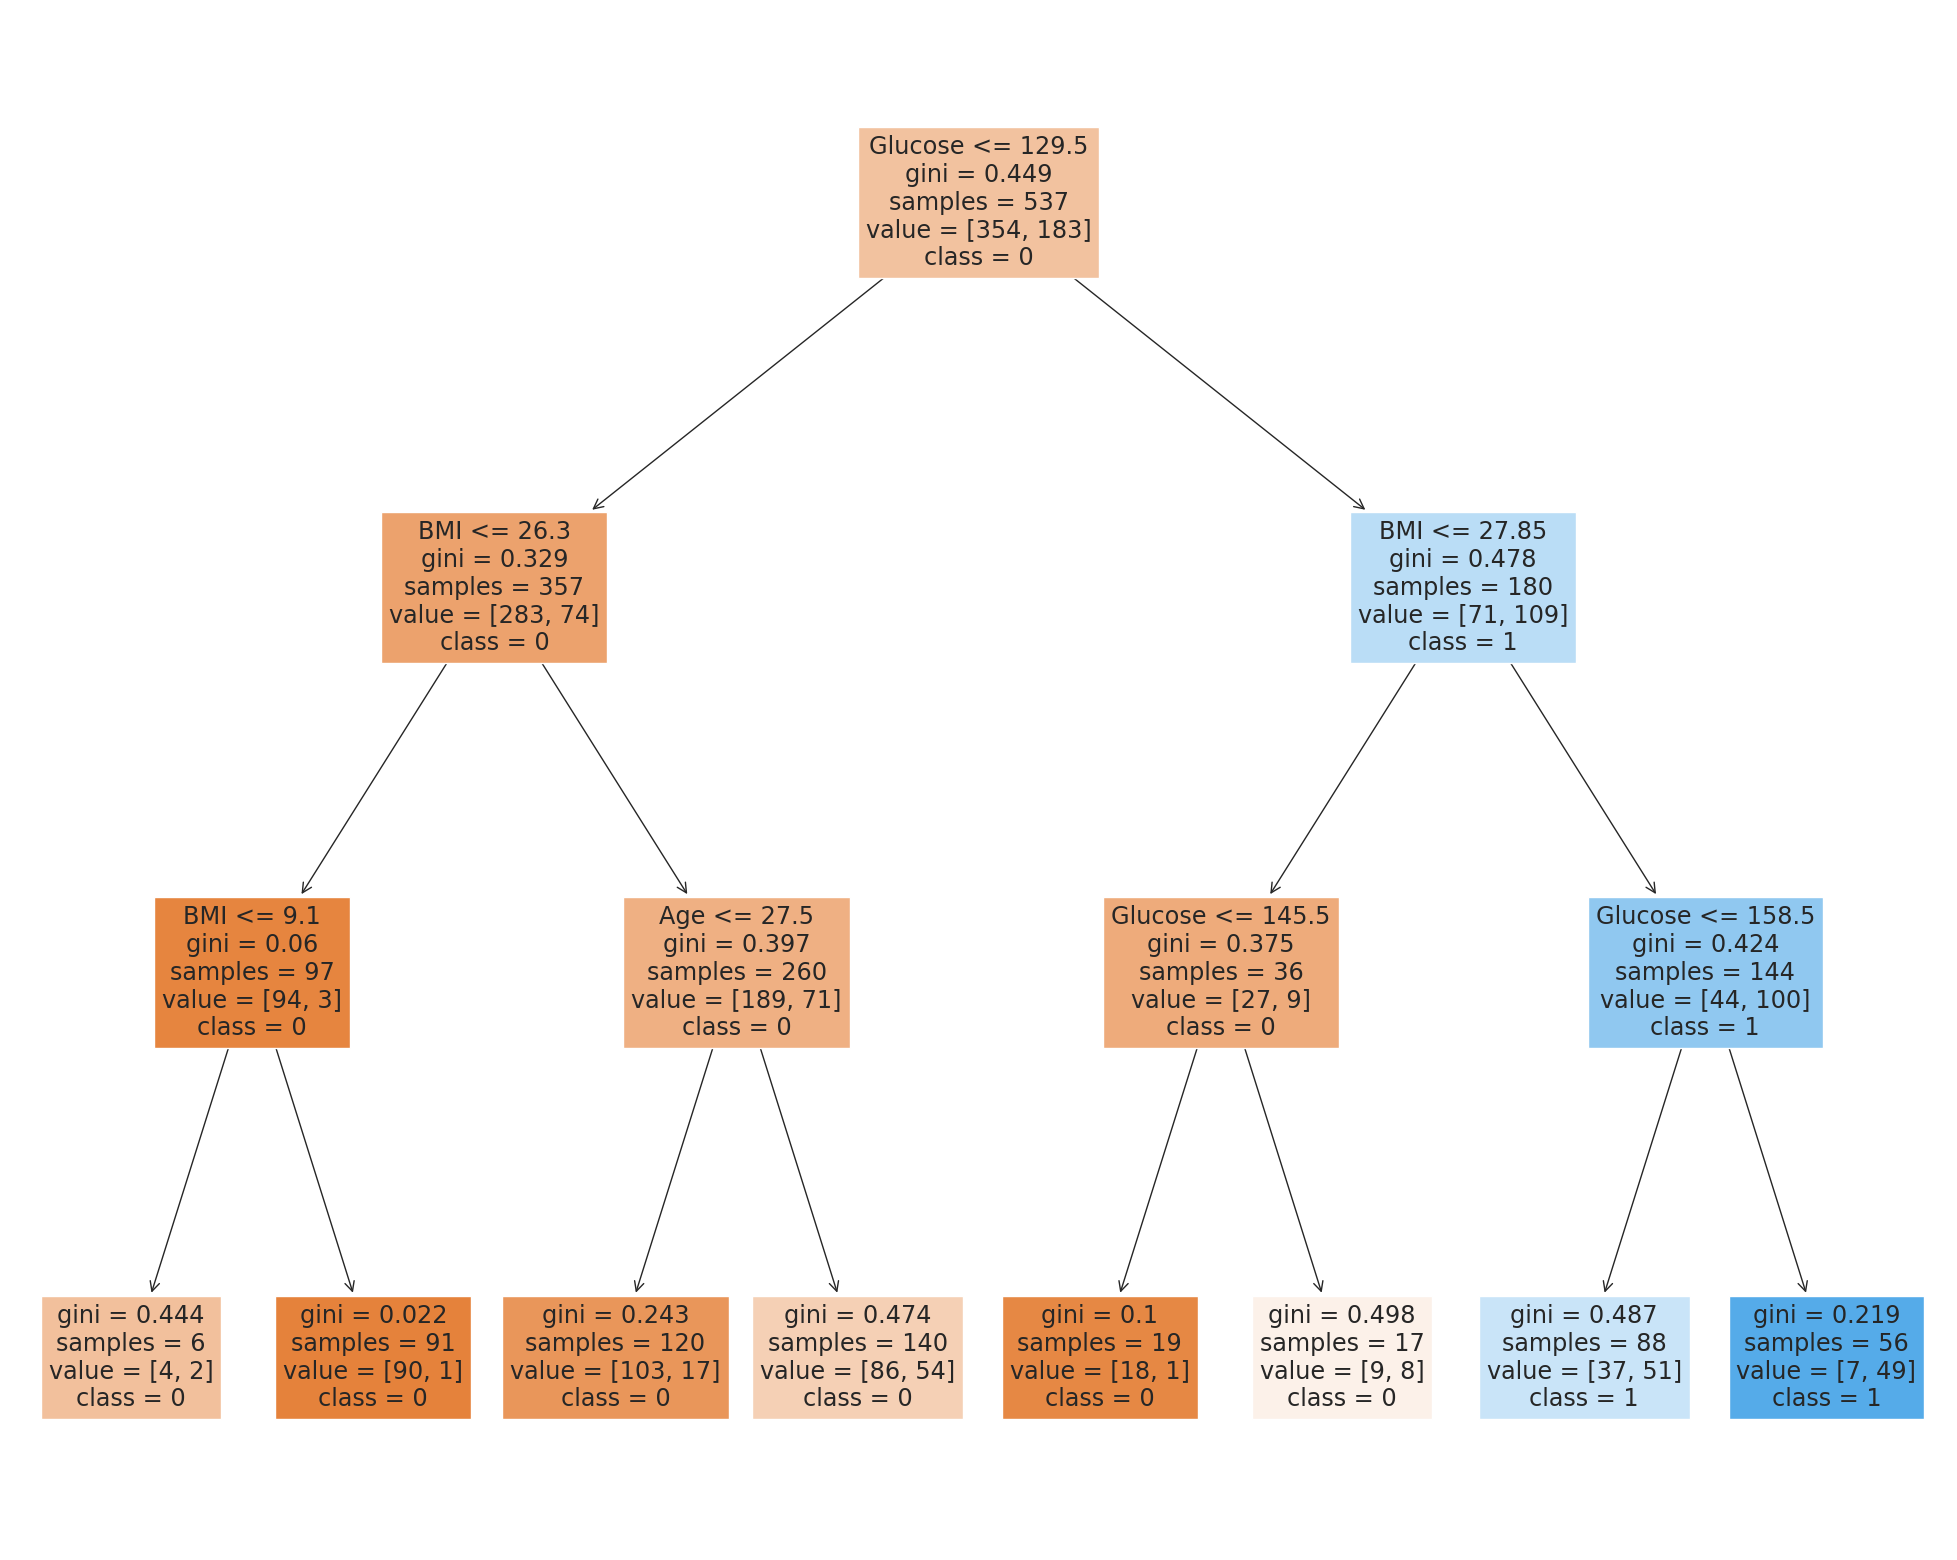

In [40]:
# Loading the dataset and setting the features and target variable
x = pd.DataFrame(df, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
y = df.Outcome.values.reshape(-1, 1)

# Splitting the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# Defining and training the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3)
clf = clf.fit(x_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(x_test)

# Generating the text representation of the decision tree and printing it
text_representation = tree.export_text(clf)
print(text_representation)

# Setting the feature and target class names
feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target_names = ['0', '1']

# Generating and saving the visualization of the decision tree
fig = plt.figure(figsize=(25, 20))
plot = tree.plot_tree(clf, feature_names=feature_names, class_names=target_names, filled=True)
fig.savefig('tree1.png')

# 13.12.Plot Importance of Variables According to Base Model

In [41]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title(f'Feature Importance - {model.__class__.__name__}')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig('importances.png')


In [42]:
model_name = [rf_model, dt_model, xgb_model, lgbm_model]

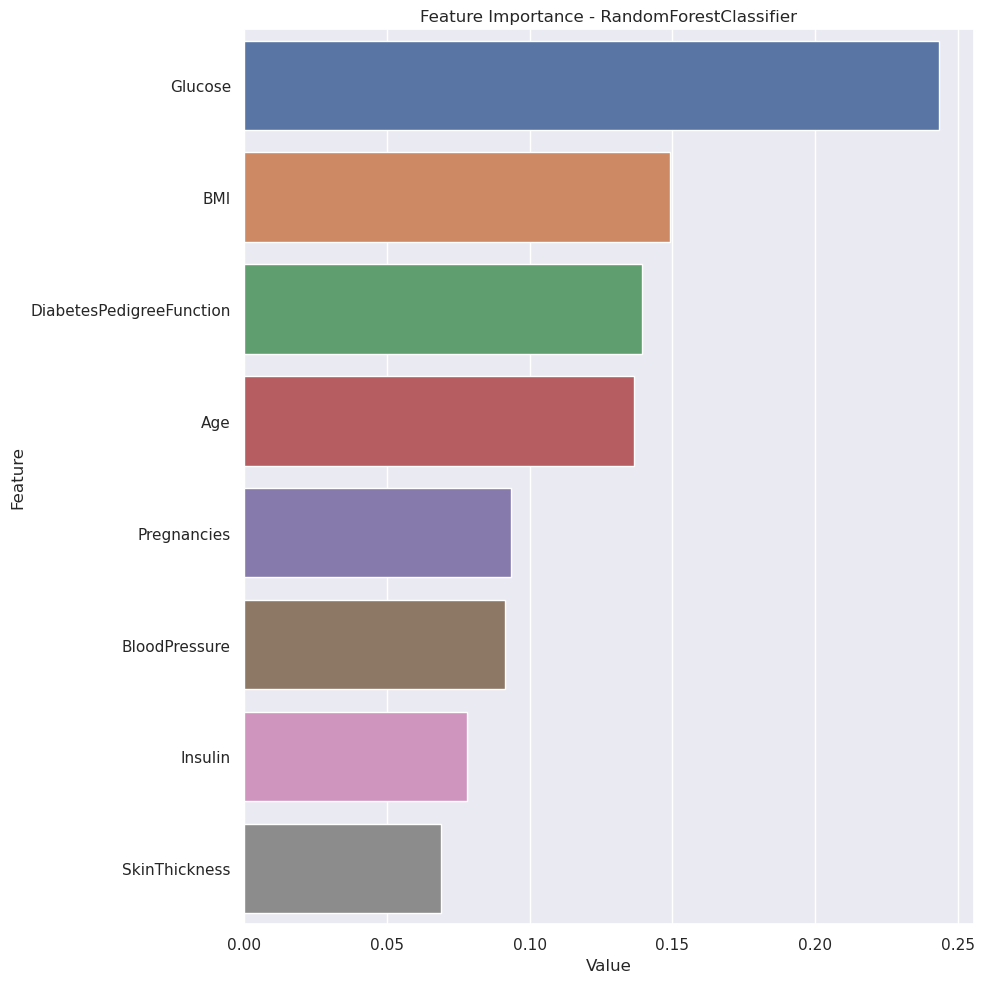

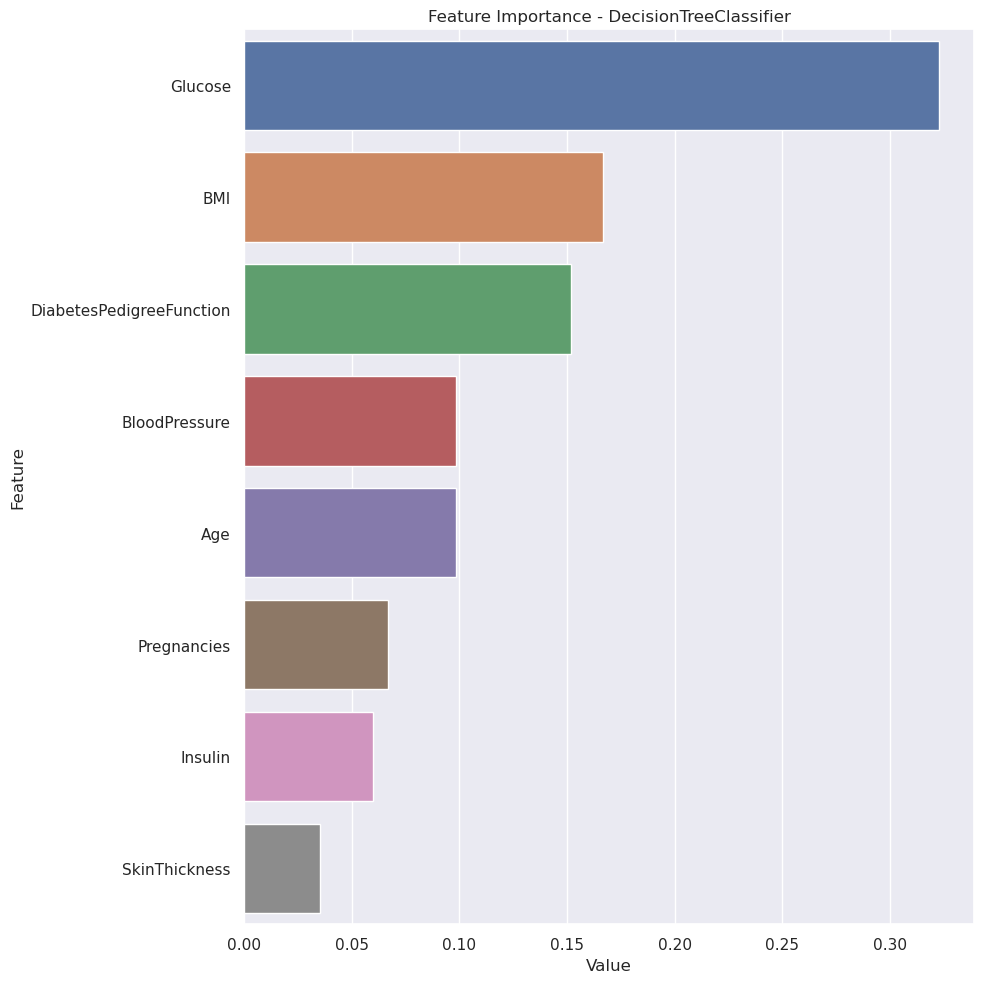

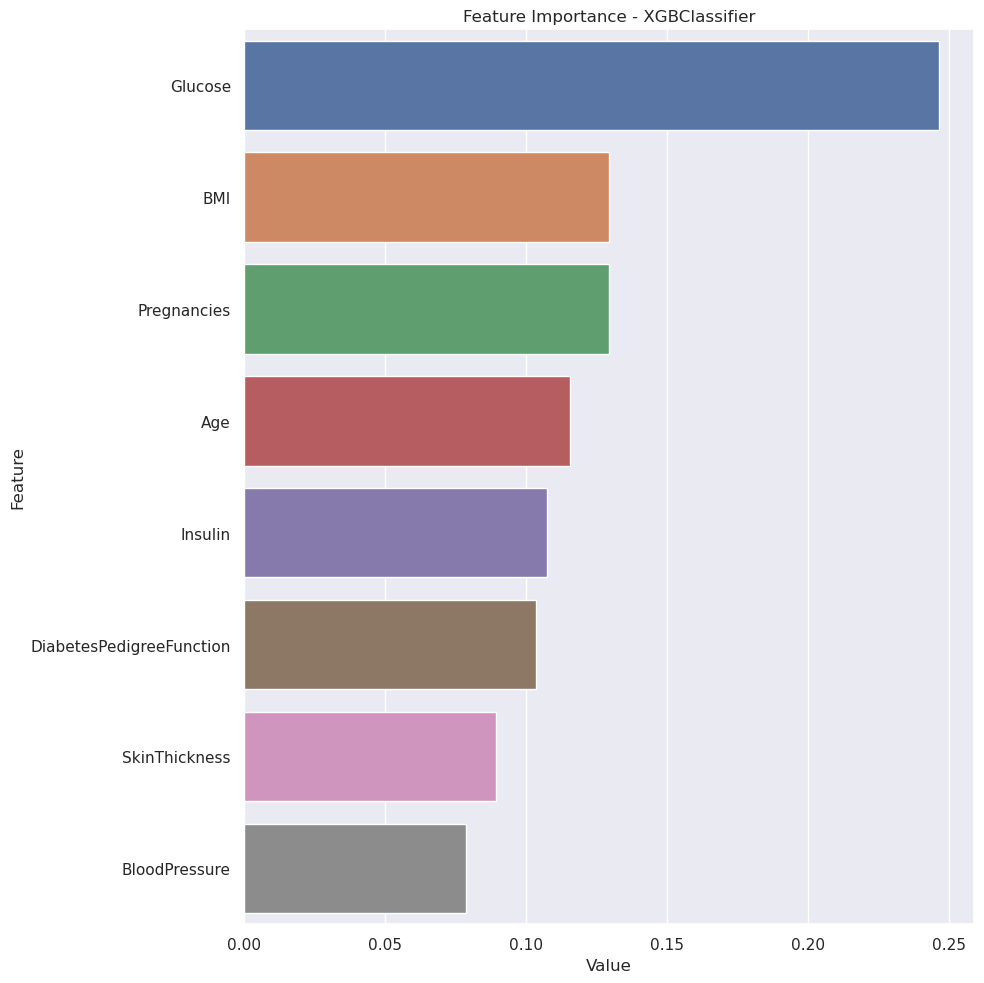

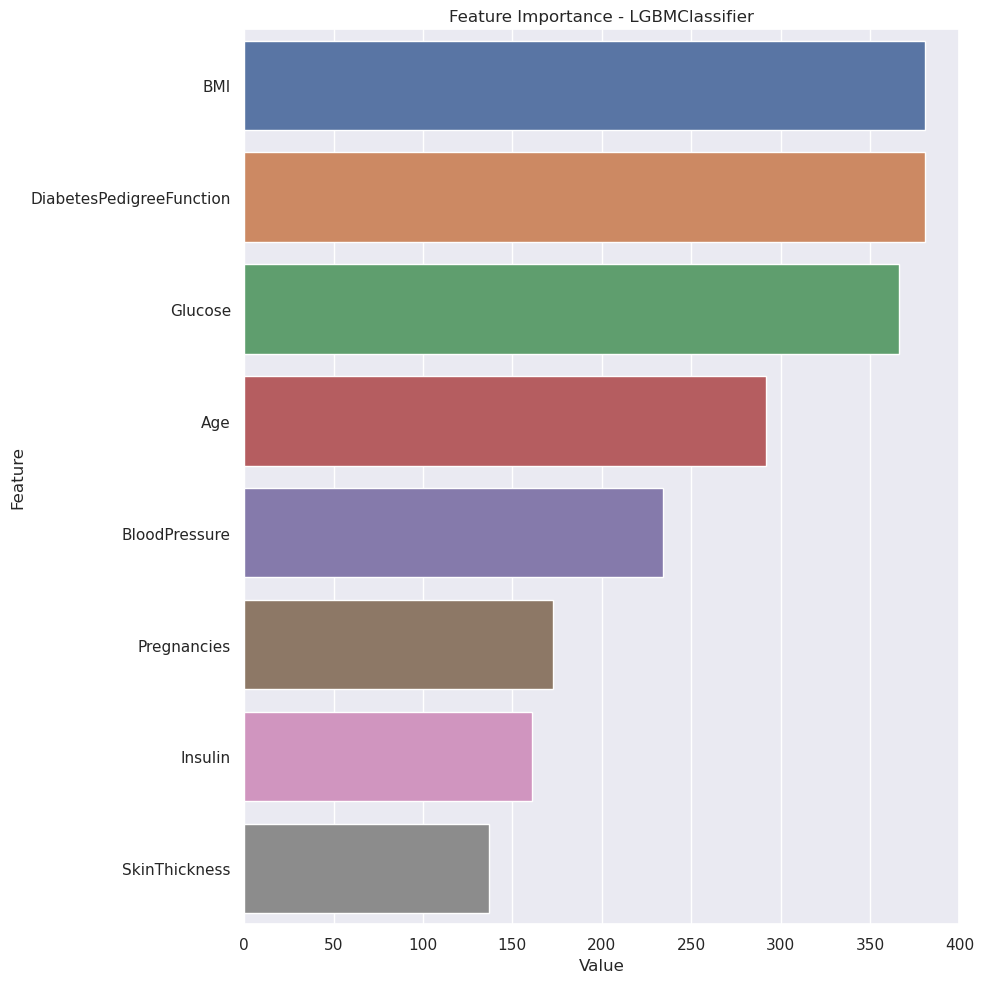

In [43]:
for i in model_name:
    plot_importance(i, X)

# 14. Feature Engineering

**In this section, we will perform the following variable engineering operations.**

- Missing Values Detection
- Outlier Detection (Outliers)
- Feature Extraction

# 15. Missing Value Analysis

In [44]:
# Detection of variables with missing observations filled with zero in the data set.

zero_colunms = [col for col in df.columns if (df[col].min() == 0 and col not in  ["Pregnancies", "Outcome"])]

In [45]:
zero_colunms

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [46]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [47]:
# Filling the missing observations in the dataset with NaN that are filled with zero.

for col in zero_colunms:
    df[col] = np.where(df[col] == 0, np.nan, df[col])

In [48]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [49]:
def missing_values_table(dataframe, na_name=False, plot=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    
    if plot:
        # Plotting the missing values
        plt.figure(figsize=(10, 8))
        bars = plt.bar(missing_df.index, missing_df['ratio'], color='purple')
        plt.xlabel('Features')
        plt.ylabel('Percentage of Missing Values')
        plt.title('Missing Values by Feature')
        
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom')
        
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
    
    if na_name:
        return na_columns


               n_miss  ratio
Insulin           374 48.700
SkinThickness     227 29.560
BloodPressure      35  4.560
BMI                11  1.430
Glucose             5  0.650


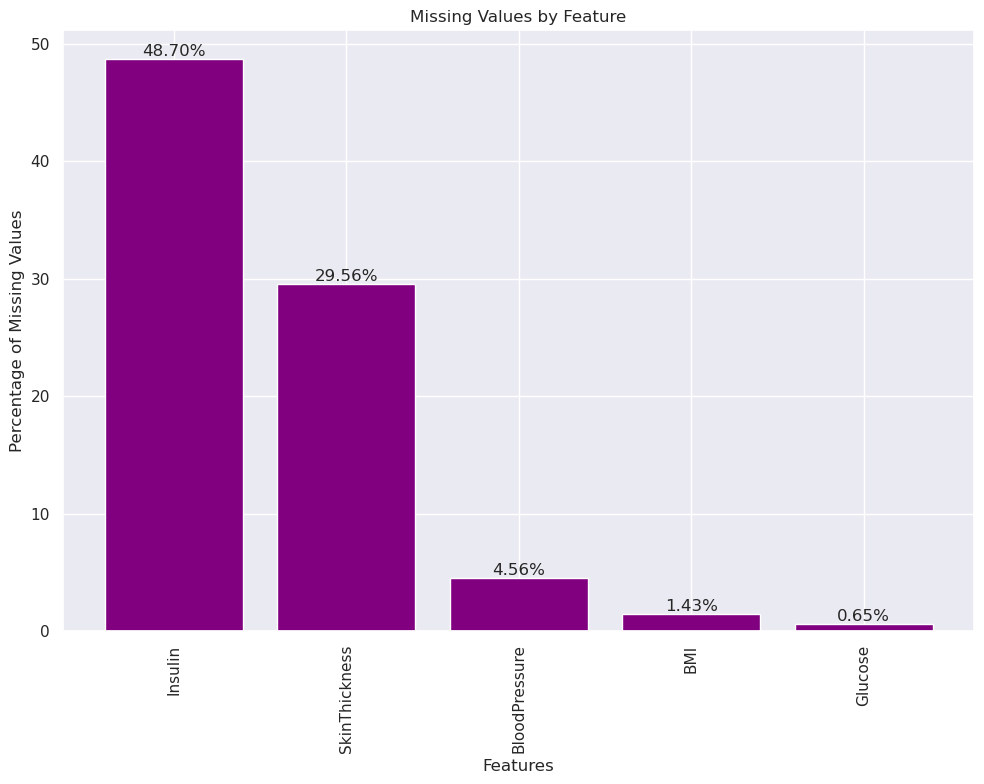

In [50]:
na_columns = missing_values_table(df, na_name=True, plot=True)

In [51]:
def missing_vs_target(dataframe, target, na_columns, plot=False):
    temp_df = dataframe.copy()
    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)
    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns
    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")
        if plot:
            # Plotting the target mean by NA flag
            plt.figure(figsize=(6, 4))
            temp_df.groupby(col)[target].mean().plot(kind='bar', color='purple')
            plt.xlabel(col)
            plt.ylabel('Target Mean')
            plt.title(f'Target Mean by {col}')
            plt.xticks(rotation=0)
            plt.tight_layout()
            plt.show()
            print("######################################################################")



                 TARGET_MEAN  Count
Glucose_NA_FLAG                    
0                      0.349    763
1                      0.400      5




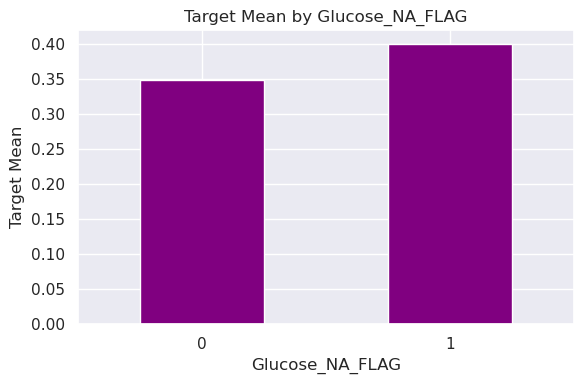

######################################################################
                       TARGET_MEAN  Count
BloodPressure_NA_FLAG                    
0                            0.344    733
1                            0.457     35




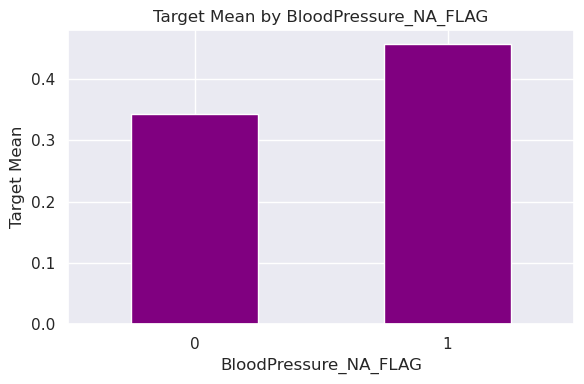

######################################################################
                       TARGET_MEAN  Count
SkinThickness_NA_FLAG                    
0                            0.333    541
1                            0.388    227




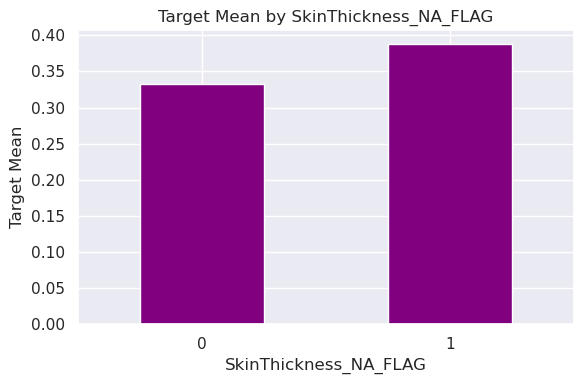

######################################################################
                 TARGET_MEAN  Count
Insulin_NA_FLAG                    
0                      0.330    394
1                      0.369    374




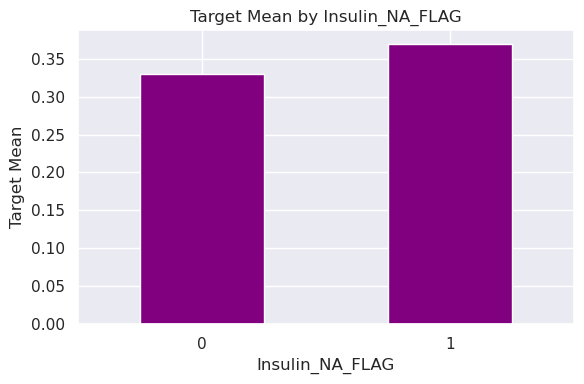

######################################################################
             TARGET_MEAN  Count
BMI_NA_FLAG                    
0                  0.351    757
1                  0.182     11




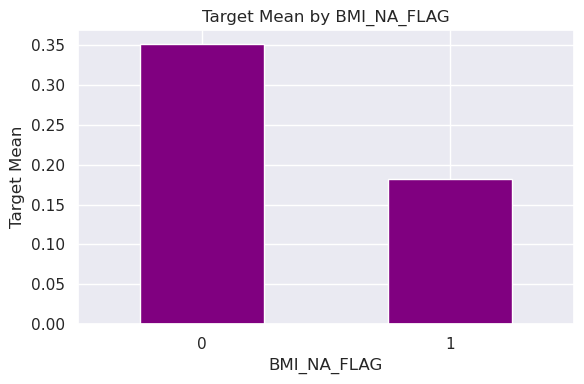

######################################################################


In [52]:
missing_vs_target(df, "Outcome", na_columns, plot=True)

In [53]:
"""
# Option 1
# Filling the missing observations filled with NaN in the data set with the median value of that column.

for col in zero_colunms:
    df.loc[df[col].isnull(), col] = df[col].median()

df.isnull().sum()

df.head(10)
"""

'\n# Option 1\n# Filling the missing observations filled with NaN in the data set with the median value of that column.\n\nfor col in zero_colunms:\n    df.loc[df[col].isnull(), col] = df[col].median()\n\ndf.isnull().sum()\n\ndf.head(10)\n'

In [54]:
# Option 2
# Filled KNN Imputers 

dff = df[na_columns]

In [55]:
rs = RobustScaler()

In [56]:
dff = pd.DataFrame(rs.fit_transform(dff), columns=dff.columns)

In [57]:
dff.head()

Glucose  BloodPressure  SkinThickness  Insulin    BMI
0    0.738          0.000          0.429      NaN  0.143
1   -0.762         -0.375          0.000      NaN -0.626
2    1.571         -0.500            NaN      NaN -0.989
3   -0.667         -0.375         -0.429   -0.273 -0.462
4    0.476         -2.000          0.429    0.378  1.187

In [58]:
dff = pd.DataFrame(KNNImputer(n_neighbors=5).fit_transform(dff), columns = dff.columns)

In [59]:
dff.head()

Glucose  BloodPressure  SkinThickness  Insulin    BMI
0    0.738          0.000          0.429    0.624  0.143
1   -0.762         -0.375          0.000   -0.452 -0.626
2    1.571         -0.500         -0.243    0.819 -0.989
3   -0.667         -0.375         -0.429   -0.273 -0.462
4    0.476         -2.000          0.429    0.378  1.187

In [60]:
dff = pd.DataFrame(rs.inverse_transform(dff), columns=dff.columns)

In [61]:
df[na_columns] = dff

In [62]:
df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0            6  148.000         72.000         35.000  196.000 33.600   
1            1   85.000         66.000         29.000   73.600 26.600   
2            8  183.000         64.000         25.600  218.200 23.300   
3            1   89.000         66.000         23.000   94.000 28.100   
4            0  137.000         40.000         35.000  168.000 43.100   
5            5  116.000         74.000         24.200   85.000 25.600   
6            3   78.000         50.000         32.000   88.000 31.000   
7           10  115.000         69.400         36.600  123.200 35.300   
8            2  197.000         70.000         45.000  543.000 30.500   
9            8  125.000         96.000         40.200  163.600 31.100   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [63]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 16. Outlier Analysis

In [64]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [65]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [66]:
def check_outlier(dataframe, col_name, plot=False):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    outliers = dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)]
    if outliers.any(axis=None):
        if plot:
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=dataframe[col_name])
            plt.title(f'Outliers in {col_name}')
            plt.show()
        return True
    else:
        return False


In [67]:
def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

Pregnancies False
Glucose False
BloodPressure False


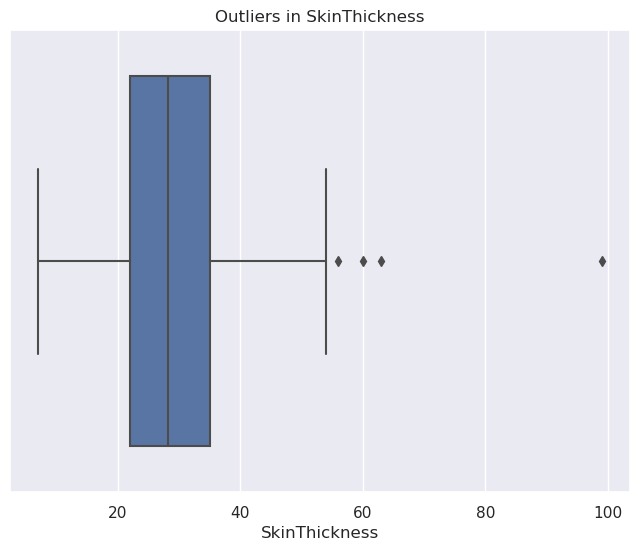

SkinThickness True


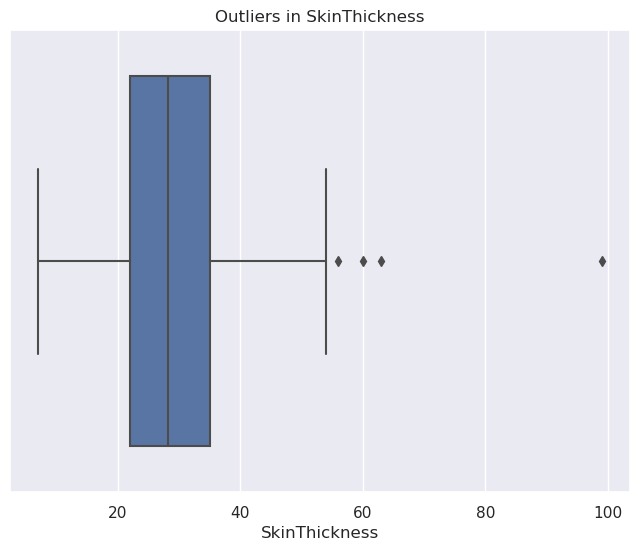

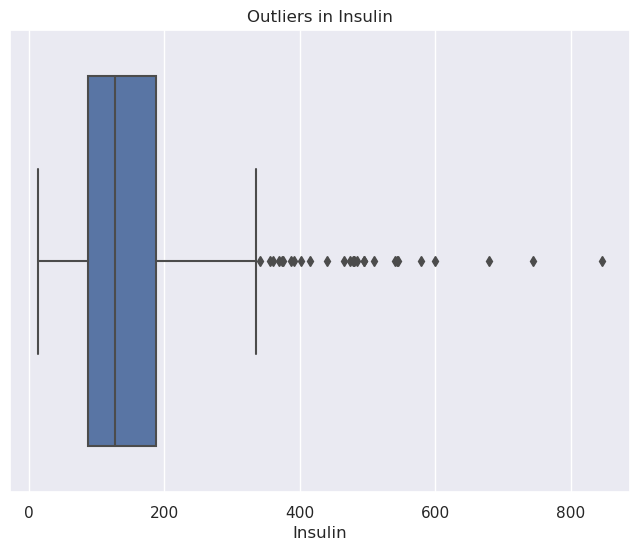

Insulin True


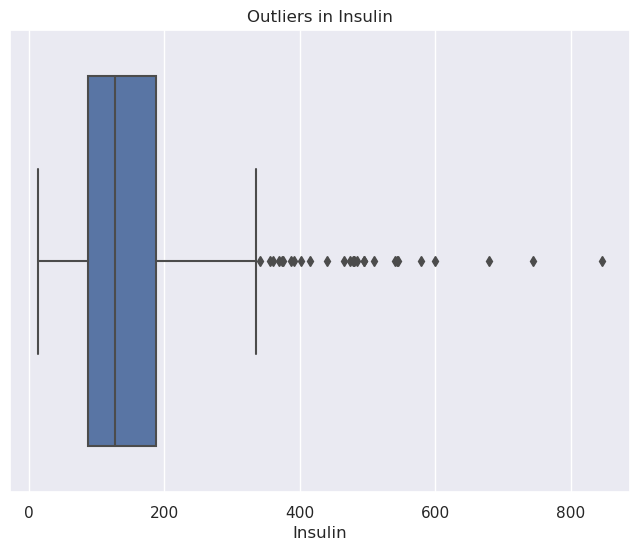

BMI False
DiabetesPedigreeFunction False
Age False
Outcome False


In [68]:
for col in df.columns:
    print(col, check_outlier(df, col, plot=True))
    if check_outlier(df, col, plot=True):
        replace_with_thresholds(df, col)

In [69]:
for col in df.columns:
    print(col, check_outlier(df, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False
Outcome False


# 17. Feature Extraction

In [70]:
# Creating a new age variable by categorizing the age variable

df.loc[(df["Age"] >= 21) & (df["Age"] < 50), "NEW_AGE_CAT"] = "mature"
df.loc[(df["Age"] >= 50), "NEW_AGE_CAT"] = "senior"

In [71]:
# BMI below 18.5 is underweight, between 18.5 and 24.9 is normal, between 24.9 and 29.9 is overweight and above 30 is obese

df['NEW_BMI'] = pd.cut(x=df['BMI'], bins=[0, 18.5, 24.9, 29.9, 100],labels=["Underweight", "Healthy", "Overweight", "Obese"])

In [72]:
# Converting Glucose Value to Categorical Variable

df["NEW_GLUCOSE"] = pd.cut(x=df["Glucose"], bins=[0, 140, 200, 300], labels=["Normal", "Prediabetes", "Diabetes"])

In [73]:
# Creating a categorical variable by considering age and body mass index together 3 breakdowns were captured

df.loc[(df["BMI"] < 18.5) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "underweightmature"
df.loc[(df["BMI"] < 18.5) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "underweightsenior"
df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "healthymature"
df.loc[((df["BMI"] >= 18.5) & (df["BMI"] < 25)) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "healthysenior"
df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "overweightmature"
df.loc[((df["BMI"] >= 25) & (df["BMI"] < 30)) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "overweightsenior"
df.loc[(df["BMI"] > 18.5) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_BMI_NOM"] = "obesemature"
df.loc[(df["BMI"] > 18.5) & (df["Age"] >= 50), "NEW_AGE_BMI_NOM"] = "obesesenior"

In [74]:
# Creating a categorical variable by considering age and glucose values together

df.loc[(df["Glucose"] < 70) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "lowmature"
df.loc[(df["Glucose"] < 70) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "lowsenior"
df.loc[((df["Glucose"] >= 70) & (df["Glucose"] < 100)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "normalmature"
df.loc[((df["Glucose"] >= 70) & (df["Glucose"] < 100)) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "normalsenior"
df.loc[((df["Glucose"] >= 100) & (df["Glucose"] <= 125)) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "hiddenmature"
df.loc[((df["Glucose"] >= 100) & (df["Glucose"] <= 125)) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "hiddensenior"
df.loc[(df["Glucose"] > 125) & ((df["Age"] >= 21) & (df["Age"] < 50)), "NEW_AGE_GLUCOSE_NOM"] = "highmature"
df.loc[(df["Glucose"] > 125) & (df["Age"] >= 50), "NEW_AGE_GLUCOSE_NOM"] = "highsenior"

In [75]:
# Deriving a Categorical variable with Insulin Value.

def set_insulin(dataframe, col_name="Insulin"):
    if 16 <= dataframe[col_name] <= 166:
        return
    else:
        return "Abnormal"

df["NEW_INSULIN_SCORE"] = df.apply(set_insulin, axis=1)
df["NEW_GLUCOSE * INSULIN"] =df["Glucose"] * df["Insulin"]


In [76]:
# Attention to values with zero !!!

df["NEW_GLUCOSE * PREGNANCIES"] = df["Glucose"] * df["Pregnancies"]

In [77]:
# Translating Column Names to Uppercase Letters.

df.columns = [col.upper() for col in df.columns]

In [78]:
df.head()

PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN    BMI  \
0            6  148.000         72.000         35.000  196.000 33.600   
1            1   85.000         66.000         29.000   73.600 26.600   
2            8  183.000         64.000         25.600  218.200 23.300   
3            1   89.000         66.000         23.000   94.000 28.100   
4            0  137.000         40.000         35.000  168.000 43.100   

   DIABETESPEDIGREEFUNCTION  AGE  OUTCOME NEW_AGE_CAT     NEW_BMI  \
0                     0.627   50        1      senior       Obese   
1                     0.351   31        0      mature  Overweight   
2                     0.672   32        1      mature     Healthy   
3                     0.167   21        0      mature  Overweight   
4                     2.288   33        1      mature       Obese   

   NEW_GLUCOSE NEW_AGE_BMI_NOM NEW_AGE_GLUCOSE_NOM NEW_INSULIN_SCORE  \
0  Prediabetes     obesesenior          highsenior          Abnormal   
1       Normal     obesemature        normalmature              None   
2  Prediabetes     obesemature          highmature          Abnormal   
3       Normal     obesemature        normalmature              None   
4       Normal     obesemature          highmature          Abnormal   

   NEW_GLUCOSE * INSULIN  NEW_GLUCOSE * PREGNANCIES  
0              29008.000                    888.000  
1               6256.000                     85.000  
2              39930.600                   1464.000  
3               8366.000                     89.000  
4              23016.000                      0.000

In [79]:
# Analysis of Variables.

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
    Note Categorical variables include categorical variables with numeric appearance.

    Parameters
    ------
        dataframe: dataframe
                Variable names of the dataframe to be taken
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optinal
                class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of cardinal variables with categorical appearance

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 return lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"] 

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car] 

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"] 

    num_cols = [col for col in num_cols if col not in num_but_cat] 
    
    print(f"Observations: {dataframe.shape[0]}") # data frame in içerisindeki gözlem sayısına eriştik.
    print(f"Variables: {dataframe.shape[1]}") # data frame in içerisindeki değişken sayısına eriştik.
    print(f'cat_cols: {len(cat_cols)}') # kaçtane kategorik değişken olduğunu tespit ettik.
    print(f'num_cols: {len(num_cols)}') # kaç tane nümerik değişken olduğunu tespit ettik.
    print(f'cat_but_car: {len(cat_but_car)}') # kaç tane kardinal değişken olduğunu tespit ettik.
    print(f'num_but_cat: {len(num_but_cat)}') # kaç tane numerik gibi görünüp kategorik olan değişken olduğunu belirledi


    return cat_cols, num_cols, cat_but_car, num_but_cat

In [80]:
cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df)

Observations: 768
Variables: 17
cat_cols: 7
num_cols: 10
cat_but_car: 0
num_but_cat: 3


In [81]:
cat_cols

['NEW_AGE_CAT',
 'NEW_AGE_BMI_NOM',
 'NEW_AGE_GLUCOSE_NOM',
 'NEW_INSULIN_SCORE',
 'OUTCOME',
 'NEW_BMI',
 'NEW_GLUCOSE']

In [82]:
num_cols

['PREGNANCIES',
 'GLUCOSE',
 'BLOODPRESSURE',
 'SKINTHICKNESS',
 'INSULIN',
 'BMI',
 'DIABETESPEDIGREEFUNCTION',
 'AGE',
 'NEW_GLUCOSE * INSULIN',
 'NEW_GLUCOSE * PREGNANCIES']

In [83]:
cat_but_car

[]

In [84]:
num_but_cat

['OUTCOME', 'NEW_BMI', 'NEW_GLUCOSE']

# 18. Encoding

In [85]:
# Label Encoding

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

In [86]:
binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]

In [87]:
binary_cols

['NEW_AGE_CAT']

In [88]:
for col in binary_cols:
    df = label_encoder(df, col)

In [89]:
df.head(10)

PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN    BMI  \
0            6  148.000         72.000         35.000  196.000 33.600   
1            1   85.000         66.000         29.000   73.600 26.600   
2            8  183.000         64.000         25.600  218.200 23.300   
3            1   89.000         66.000         23.000   94.000 28.100   
4            0  137.000         40.000         35.000  168.000 43.100   
5            5  116.000         74.000         24.200   85.000 25.600   
6            3   78.000         50.000         32.000   88.000 31.000   
7           10  115.000         69.400         36.600  123.200 35.300   
8            2  197.000         70.000         45.000  543.000 30.500   
9            8  125.000         96.000         40.200  163.600 31.100   

   DIABETESPEDIGREEFUNCTION  AGE  OUTCOME  NEW_AGE_CAT     NEW_BMI  \
0                     0.627   50        1            1       Obese   
1                     0.351   31        0            0  Overweight   
2                     0.672   32        1            0     Healthy   
3                     0.167   21        0            0  Overweight   
4                     2.288   33        1            0       Obese   
5                     0.201   30        0            0  Overweight   
6                     0.248   26        1            0       Obese   
7                     0.134   29        0            0       Obese   
8                     0.158   53        1            1       Obese   
9                     0.232   54        1            1       Obese   

   NEW_GLUCOSE NEW_AGE_BMI_NOM NEW_AGE_GLUCOSE_NOM NEW_INSULIN_SCORE  \
0  Prediabetes     obesesenior          highsenior          Abnormal   
1       Normal     obesemature        normalmature              None   
2  Prediabetes     obesemature          highmature          Abnormal   
3       Normal     obesemature        normalmature              None   
4       Normal     obesemature          highmature          Abnormal   
5       Normal     obesemature        hiddenmature              None   
6       Normal     obesemature        normalmature              None   
7       Normal     obesemature        hiddenmature              None   
8  Prediabetes     obesesenior          highsenior          Abnormal   
9       Normal     obesesenior        hiddensenior              None   

   NEW_GLUCOSE * INSULIN  NEW_GLUCOSE * PREGNANCIES  
0              29008.000                    888.000  
1               6256.000                     85.000  
2              39930.600                   1464.000  
3               8366.000                     89.000  
4              23016.000                      0.000  
5               9860.000                    580.000  
6               6864.000                    234.000  
7              14168.000                   1150.000  
8             106971.000                    394.000  
9              20450.000                   1000.000

In [90]:
# One-Hot Encoding

# cat_cols listesinin güncelleme işlemi

In [91]:
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["OUTCOME"]]

In [92]:
cat_cols

['NEW_AGE_BMI_NOM',
 'NEW_AGE_GLUCOSE_NOM',
 'NEW_INSULIN_SCORE',
 'NEW_BMI',
 'NEW_GLUCOSE']

In [93]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [94]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [95]:
df.head(10)

PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN    BMI  \
0            6  148.000         72.000         35.000  196.000 33.600   
1            1   85.000         66.000         29.000   73.600 26.600   
2            8  183.000         64.000         25.600  218.200 23.300   
3            1   89.000         66.000         23.000   94.000 28.100   
4            0  137.000         40.000         35.000  168.000 43.100   
5            5  116.000         74.000         24.200   85.000 25.600   
6            3   78.000         50.000         32.000   88.000 31.000   
7           10  115.000         69.400         36.600  123.200 35.300   
8            2  197.000         70.000         45.000  543.000 30.500   
9            8  125.000         96.000         40.200  163.600 31.100   

   DIABETESPEDIGREEFUNCTION  AGE  OUTCOME  NEW_AGE_CAT  NEW_GLUCOSE * INSULIN  \
0                     0.627   50        1            1              29008.000   
1                     0.351   31        0            0               6256.000   
2                     0.672   32        1            0              39930.600   
3                     0.167   21        0            0               8366.000   
4                     2.288   33        1            0              23016.000   
5                     0.201   30        0            0               9860.000   
6                     0.248   26        1            0               6864.000   
7                     0.134   29        0            0              14168.000   
8                     0.158   53        1            1             106971.000   
9                     0.232   54        1            1              20450.000   

   NEW_GLUCOSE * PREGNANCIES  NEW_AGE_BMI_NOM_obesesenior  \
0                    888.000                            1   
1                     85.000                            0   
2                   1464.000                            0   
3                     89.000                            0   
4                      0.000                            0   
5                    580.000                            0   
6                    234.000                            0   
7                   1150.000                            0   
8                    394.000                            1   
9                   1000.000                            1   

   NEW_AGE_BMI_NOM_underweightmature  NEW_AGE_GLUCOSE_NOM_hiddensenior  \
0                                  0                                 0   
1                                  0                                 0   
2                                  0                                 0   
3                                  0                                 0   
4                                  0                                 0   
5                                  0                                 0   
6                                  0                                 0   
7                                  0                                 0   
8                                  0                                 0   
9                                  0                                 1   

   NEW_AGE_GLUCOSE_NOM_highmature  NEW_AGE_GLUCOSE_NOM_highsenior  \
0                               0                               1   
1                               0                               0   
2                               1                               0   
3                               0                               0   
4                               1                               0   
5                               0                               0   
6                               0                               0   
7                               0                               0   
8                               0                               1   
9                               0                               0   

   NEW_AGE_GLUCOSE_NOM_lowmature  NEW_AGE_GLUCOSE_NOM_lowsen

# 19. Standardization Process

In [96]:
num_cols

['PREGNANCIES',
 'GLUCOSE',
 'BLOODPRESSURE',
 'SKINTHICKNESS',
 'INSULIN',
 'BMI',
 'DIABETESPEDIGREEFUNCTION',
 'AGE',
 'NEW_GLUCOSE * INSULIN',
 'NEW_GLUCOSE * PREGNANCIES']

In [97]:
scaler = RobustScaler()

In [98]:
df[num_cols] = scaler.fit_transform(df[num_cols])

In [99]:
df.head(10)

PREGNANCIES  GLUCOSE  BLOODPRESSURE  SKINTHICKNESS  INSULIN    BMI  \
0        0.600    0.765          0.000          0.523    0.680  0.159   
1       -0.400   -0.790         -0.375          0.062   -0.541 -0.610   
2        1.000    1.630         -0.500         -0.200    0.902 -0.973   
3       -0.400   -0.691         -0.375         -0.400   -0.337 -0.445   
4       -0.600    0.494         -2.000          0.523    0.401  1.203   
5        0.400   -0.025          0.125         -0.308   -0.427 -0.720   
6        0.000   -0.963         -1.375          0.292   -0.397 -0.126   
7        1.400   -0.049         -0.162          0.646   -0.046  0.346   
8       -0.200    1.975         -0.125          1.292    4.142 -0.181   
9        1.000    0.198          1.500          0.923    0.357 -0.115   

   DIABETESPEDIGREEFUNCTION    AGE  OUTCOME  NEW_AGE_CAT  \
0                     0.665  1.235        1            1   
1                    -0.056  0.118        0            0   
2                     0.783  0.176        1            0   
3                    -0.537 -0.471        0            0   
4                     5.008  0.235        1            0   
5                    -0.448  0.059        0            0   
6                    -0.325 -0.176        1            0   
7                    -0.624  0.000        0            0   
8                    -0.561  1.412        1            1   
9                    -0.367  1.471        1            1   

   NEW_GLUCOSE * INSULIN  NEW_GLUCOSE * PREGNANCIES  \
0                  0.847                      0.907   
1                 -0.535                     -0.421   
2                  1.510                      1.859   
3                 -0.407                     -0.414   
4                  0.483                     -0.561   
5                 -0.316                      0.398   
6                 -0.498                     -0.174   
7                 -0.054                      1.340   
8                  5.582                      0.090   
9                  0.327                      1.092   

   NEW_AGE_BMI_NOM_obesesenior  NEW_AGE_BMI_NOM_underweightmature  \
0                            1                                  0   
1                            0                                  0   
2                            0                                  0   
3                            0                                  0   
4                            0                                  0   
5                            0                                  0   
6                            0                                  0   
7                            0                                  0   
8                            1                                  0   
9                            1                                  0   

   NEW_AGE_GLUCOSE_NOM_hiddensenior  NEW_AGE_GLUCOSE_NOM_highmature  \
0                                 0                               0   
1                                 0                               0   
2                                 0                               1   
3                                 0                               0   
4                                 0                               1   
5                                 0                               0   
6                                 0                               0   
7                                 0                               0   
8                                 0                               0   
9                                 1                               0   

   NEW_AGE_GLUCOSE_NOM_highsenior  NEW_AGE_GLUCOSE_NOM_lowmature  \
0                               1                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                 

In [100]:
df.shape

(768, 26)

# 20. Model Building

In [101]:
# Creating the Dependent Variable.

y = df["OUTCOME"]

# Creating Independent Variables.

X = df.drop("OUTCOME", axis=1)

# Splitting the Data into Training and Test Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

# 20.1.RandomForestClassifier

In [102]:
# Random Forest Classifier Model Training

rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)

# Prediction using Random Forest Classifier Model

y_pred = rf_model.predict(X_test)

print("RandomForestClassifier:")
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(y_pred,y_test),4)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 4)}")
print(f"F1: {round(f1_score(y_pred,y_test), 4)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 4)}")

RandomForestClassifier:
Accuracy: 0.7749
Recall: 0.7101
Precision: 0.6049
F1: 0.6533
Auc: 0.7563


In [103]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title(f'Feature Importance - RandomForestClassifier')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig('importances.png')

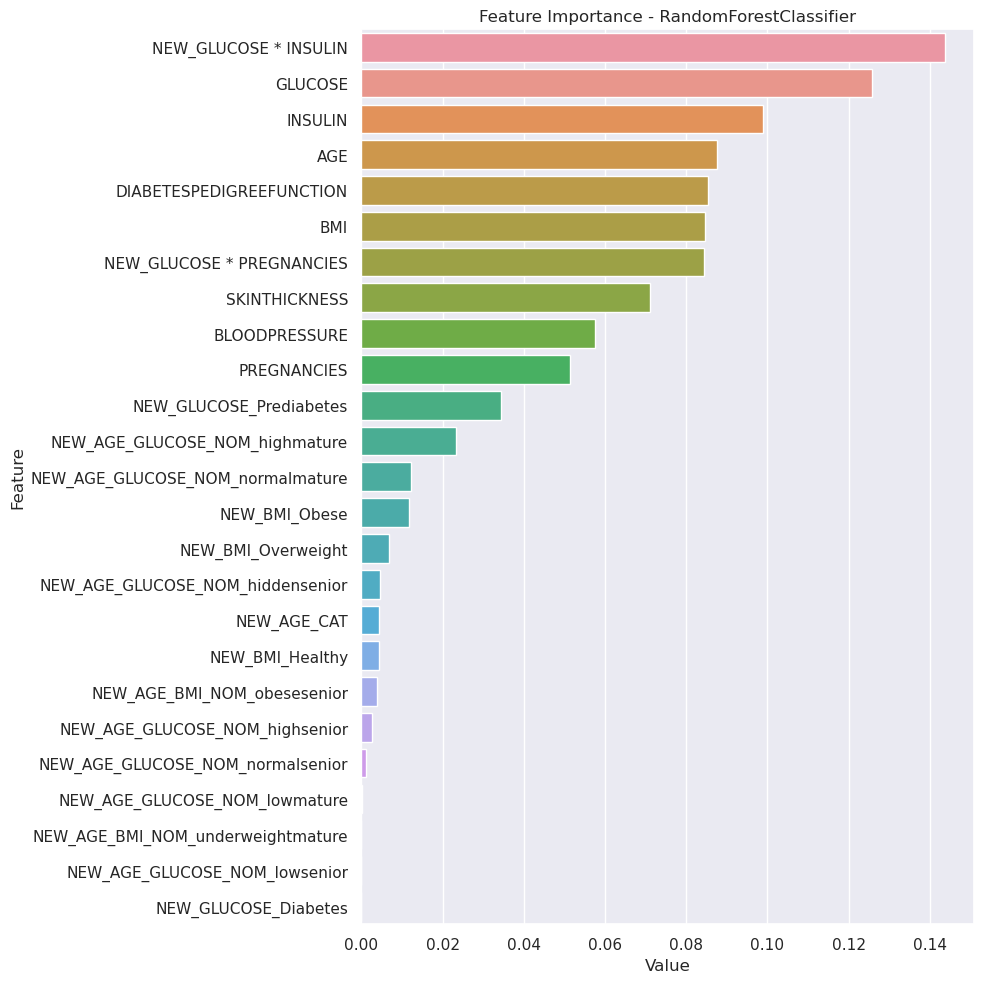

In [104]:
plot_importance(rf_model, X)

# 20.1.1.Random Forest Classifier Hyperparameter Optimization

In [105]:
rf_model = RandomForestClassifier(random_state=46)
parameters = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(rf_model, parameters, cv=5).fit(X_train, y_train)

best_rf_model = rf_grid.best_estimator_

# En iyi modeli kullanarak tahmin yapma
y_pred = best_rf_model.predict(X_test)
print("Random Forest Classifier - Hyperparameter Optimization")
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(y_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(y_pred, y_test), 4)}")
print(f"F1: {round(f1_score(y_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(y_pred, y_test), 4)}")

Random Forest Classifier - Hyperparameter Optimization
Accuracy: 0.7749
Recall: 0.6986
Precision: 0.6296
F1: 0.6623
AUC: 0.7544


# 20.2.Logistic Regression

In [106]:
lr_model = LogisticRegression(random_state=46).fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

print("Logistic Regression:")
print(f"Accuracy: {round(accuracy_score(lr_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(lr_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(lr_pred, y_test), 4)}")
print(f"F1: {round(f1_score(lr_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(lr_pred, y_test), 4)}")

Logistic Regression:
Accuracy: 0.7532
Recall: 0.6875
Precision: 0.5432
F1: 0.6069
AUC: 0.733


# 20.2.1.Logistic Regression Hyperparameter Optimization

In [107]:
lr_model = LogisticRegression(random_state=46)
parameters = {'C': [0.1, 1, 10],
              'penalty': ['l1', 'l2']}
lr_grid = GridSearchCV(lr_model, parameters, cv=5).fit(X_train, y_train)

best_lr_model = lr_grid.best_estimator_

print("Logistic Regression - Hyperparameter Optimization")
print(f"Best Parameters: {lr_grid.best_params_}")
print(f"Accuracy: {round(lr_grid.best_score_, 4)}")
print(f"Recall: {round(recall_score(best_lr_model.predict(X_test), y_test), 4)}")
print(f"Precision: {round(precision_score(best_lr_model.predict(X_test), y_test), 4)}")
print(f"F1: {round(f1_score(best_lr_model.predict(X_test), y_test), 4)}")
print(f"AUC: {round(roc_auc_score(best_lr_model.predict(X_test), y_test), 4)}")

Logistic Regression - Hyperparameter Optimization
Best Parameters: {'C': 1, 'penalty': 'l2'}
Accuracy: 0.7654
Recall: 0.6875
Precision: 0.5432
F1: 0.6069
AUC: 0.733


# 20.3.K-Nearest Neighbors (KNN)

In [108]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)

knn_pred = knn_model.predict(X_test)

print("K-Nearest Neighbors (KNN):")
print(f"Accuracy: {round(accuracy_score(knn_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(knn_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(knn_pred, y_test), 4)}")
print(f"F1: {round(f1_score(knn_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(knn_pred, y_test), 4)}")

K-Nearest Neighbors (KNN):
Accuracy: 0.7792
Recall: 0.7027
Precision: 0.642
F1: 0.671
AUC: 0.759


# 20.3.1.K-Nearest Neighbors (KNN) Hyperparameter Optimization

In [109]:
knn_model = KNeighborsClassifier()
parameters = {'n_neighbors': [3, 5, 7],
              'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(knn_model, parameters, cv=5).fit(X_train, y_train)

best_knn_model = knn_grid.best_estimator_

print("K-Nearest Neighbors (KNN) - Hyperparameter Optimization")
print(f"Best Parameters: {knn_grid.best_params_}")
print(f"Accuracy: {round(knn_grid.best_score_, 4)}")
print(f"Recall: {round(recall_score(best_knn_model.predict(X_test), y_test), 4)}")
print(f"Precision: {round(precision_score(best_knn_model.predict(X_test), y_test), 4)}")
print(f"F1: {round(f1_score(best_knn_model.predict(X_test), y_test), 4)}")
print(f"AUC: {round(roc_auc_score(best_knn_model.predict(X_test), y_test), 4)}")

K-Nearest Neighbors (KNN) - Hyperparameter Optimization
Best Parameters: {'n_neighbors': 5, 'weights': 'distance'}
Accuracy: 0.7487
Recall: 0.6986
Precision: 0.6296
F1: 0.6623
AUC: 0.7544


# 20.4.Support Vector Classifier (SVC)

In [110]:
svc_model = SVC(random_state=46).fit(X_train, y_train)

svc_pred = svc_model.predict(X_test)

print("Support Vector Classifier (SVC):")
print(f"Accuracy: {round(accuracy_score(svc_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(svc_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(svc_pred, y_test), 4)}")
print(f"F1: {round(f1_score(svc_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(svc_pred, y_test), 4)}")

Support Vector Classifier (SVC):
Accuracy: 0.7792
Recall: 0.7419
Precision: 0.5679
F1: 0.6434
AUC: 0.7674


# 20.4.1.Support Vector Classifier (SVC) Hyperparameter Optimization

In [111]:
svc_model = SVC(random_state=46)
parameters = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf']}
svc_grid = GridSearchCV(svc_model, parameters, cv=5).fit(X_train, y_train)

best_svc_model = svc_grid.best_estimator_

print("Support Vector Classifier (SVC) - Hyperparameter Optimization")
print(f"Best Parameters: {svc_grid.best_params_}")
print(f"Accuracy: {round(svc_grid.best_score_, 4)}")
print(f"Recall: {round(recall_score(best_svc_model.predict(X_test), y_test), 4)}")
print(f"Precision: {round(precision_score(best_svc_model.predict(X_test), y_test), 4)}")
print(f"F1: {round(f1_score(best_svc_model.predict(X_test), y_test), 4)}")
print(f"AUC: {round(roc_auc_score(best_svc_model.predict(X_test), y_test), 4)}")

Support Vector Classifier (SVC) - Hyperparameter Optimization
Best Parameters: {'C': 0.1, 'kernel': 'linear'}
Accuracy: 0.7691
Recall: 0.7049
Precision: 0.5309
F1: 0.6056
AUC: 0.7407


# 20.5.Decision Tree Classifier

In [112]:
dt_model = DecisionTreeClassifier(random_state=46).fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)

print("Decision Tree Classifier:")
print(f"Accuracy: {round(accuracy_score(dt_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(dt_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(dt_pred, y_test), 4)}")
print(f"F1: {round(f1_score(dt_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(dt_pred, y_test), 4)}")

Decision Tree Classifier:
Accuracy: 0.7229
Recall: 0.5955
Precision: 0.6543
F1: 0.6235
AUC: 0.6992


In [113]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title(f'Feature Importance - {model.__class__.__name__}')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig('importances.png')

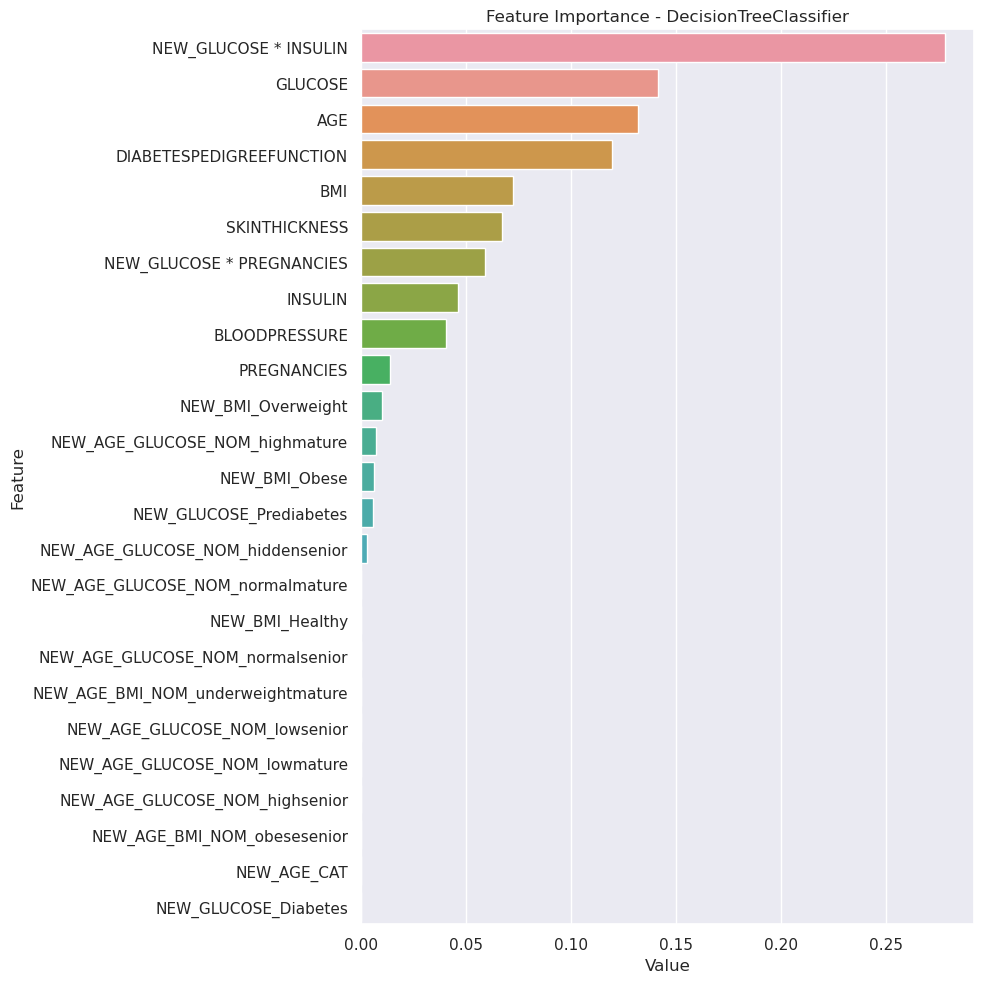

In [114]:
plot_importance(dt_model, X)

# 20.5.1.Decision Tree Classifier Hyperparameter Optimization

In [115]:
dt_model = DecisionTreeClassifier(random_state=46)
parameters = {'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(dt_model, parameters, cv=5).fit(X_train, y_train)

best_dt_model = dt_grid.best_estimator_

print("Decision Tree Classifier - Hyperparameter Optimization")
print(f"Best Parameters: {dt_grid.best_params_}")
print(f"Accuracy: {round(dt_grid.best_score_, 4)}")
print(f"Recall: {round(recall_score(best_dt_model.predict(X_test), y_test), 4)}")
print(f"Precision: {round(precision_score(best_dt_model.predict(X_test), y_test), 4)}")
print(f"F1: {round(f1_score(best_dt_model.predict(X_test), y_test), 4)}")
print(f"AUC: {round(roc_auc_score(best_dt_model.predict(X_test), y_test), 4)}")

Decision Tree Classifier - Hyperparameter Optimization
Best Parameters: {'max_depth': 10, 'min_samples_split': 10}
Accuracy: 0.7188
Recall: 0.618
Precision: 0.679
F1: 0.6471
AUC: 0.7174


# 20.6.AdaBoost Classifier

In [116]:
ada_model = AdaBoostClassifier(random_state=46).fit(X_train, y_train)

ada_pred = ada_model.predict(X_test)

print("AdaBoost Classifier:")
print(f"Accuracy: {round(accuracy_score(ada_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(ada_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(ada_pred, y_test), 4)}")
print(f"F1: {round(f1_score(ada_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(ada_pred, y_test), 4)}")

AdaBoost Classifier:
Accuracy: 0.7662
Recall: 0.6957
Precision: 0.5926
F1: 0.64
AUC: 0.746


# 20.6.1.AdaBoost Classifier Hyperparameter Optimization

In [117]:
ada_model = AdaBoostClassifier(random_state=46)
parameters = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.1, 0.5, 1.0]}
ada_grid = GridSearchCV(ada_model, parameters, cv=5).fit(X_train, y_train)

best_ada_model = ada_grid.best_estimator_

print("AdaBoost Classifier - Hyperparameter Optimization")
print(f"Best Parameters: {ada_grid.best_params_}")
print(f"Accuracy: {round(ada_grid.best_score_, 4)}")
print(f"Recall: {round(recall_score(best_ada_model.predict(X_test), y_test), 4)}")
print(f"Precision: {round(precision_score(best_ada_model.predict(X_test), y_test), 4)}")
print(f"F1: {round(f1_score(best_ada_model.predict(X_test), y_test), 4)}")
print(f"AUC: {round(roc_auc_score(best_ada_model.predict(X_test), y_test), 4)}")

AdaBoost Classifier - Hyperparameter Optimization
Best Parameters: {'learning_rate': 0.5, 'n_estimators': 50}
Accuracy: 0.745
Recall: 0.7
Precision: 0.6049
F1: 0.649
AUC: 0.7506


# 20.7.Gradient Boosting Classifier

In [118]:
gb_model = GradientBoostingClassifier(random_state=46).fit(X_train, y_train)

gb_pred = gb_model.predict(X_test)

print("Gradient Boosting Classifier:")
print(f"Accuracy: {round(accuracy_score(gb_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(gb_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(gb_pred, y_test), 4)}")
print(f"F1: {round(f1_score(gb_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(gb_pred, y_test), 4)}")

Gradient Boosting Classifier:
Accuracy: 0.7662
Recall: 0.6901
Precision: 0.6049
F1: 0.6447
AUC: 0.7451


In [119]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title(f'Feature Importance - {model.__class__.__name__}')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig('importances.png')

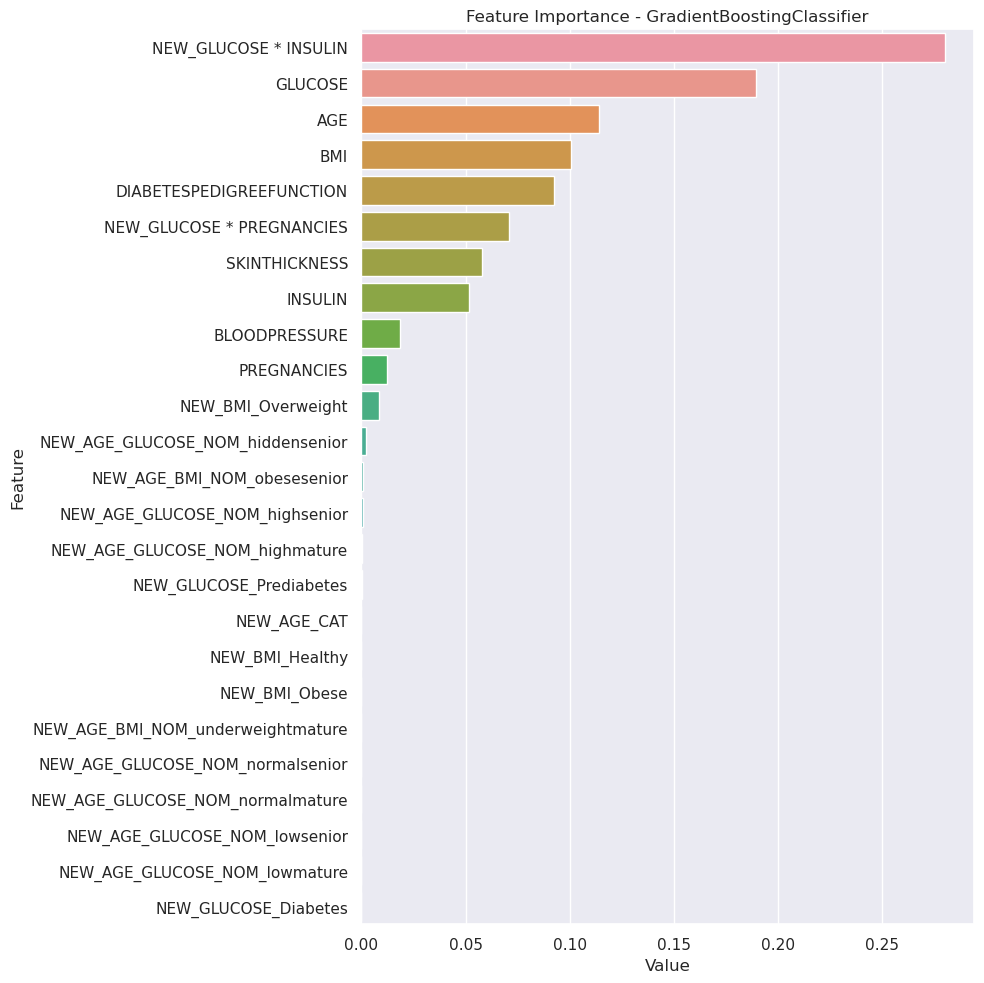

In [120]:
plot_importance(gb_model, X)

# 20.7.1.Gradient Boosting Classifier Hyperparameter Optimization

In [121]:
gb_model = GradientBoostingClassifier(random_state=46)
parameters = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.1, 0.5, 1.0]}
gb_grid = GridSearchCV(gb_model, parameters, cv=5).fit(X_train, y_train)

best_gb_model = gb_grid.best_estimator_

print("Gradient Boosting Classifier - Hyperparameter Optimization")
print(f"Best Parameters: {gb_grid.best_params_}")
print(f"Accuracy: {round(gb_grid.best_score_, 4)}")
print(f"Recall: {round(recall_score(best_gb_model.predict(X_test), y_test), 4)}")
print(f"Precision: {round(precision_score(best_gb_model.predict(X_test), y_test), 4)}")
print(f"F1: {round(f1_score(best_gb_model.predict(X_test), y_test), 4)}")
print(f"AUC: {round(roc_auc_score(best_gb_model.predict(X_test), y_test), 4)}")

Gradient Boosting Classifier - Hyperparameter Optimization
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Accuracy: 0.771
Recall: 0.6901
Precision: 0.6049
F1: 0.6447
AUC: 0.7451


# 20.8.XGBoost Classifier

In [122]:
xgb_model = XGBClassifier(random_state=46).fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)

print("XGBoost Classifier:")
print(f"Accuracy: {round(accuracy_score(xgb_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(xgb_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(xgb_pred, y_test), 4)}")
print(f"F1: {round(f1_score(xgb_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(xgb_pred, y_test), 4)}")

XGBoost Classifier:
Accuracy: 0.7879
Recall: 0.7105
Precision: 0.6667
F1: 0.6879
AUC: 0.7682


In [123]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title(f'Feature Importance - {model.__class__.__name__}')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig('importances.png')

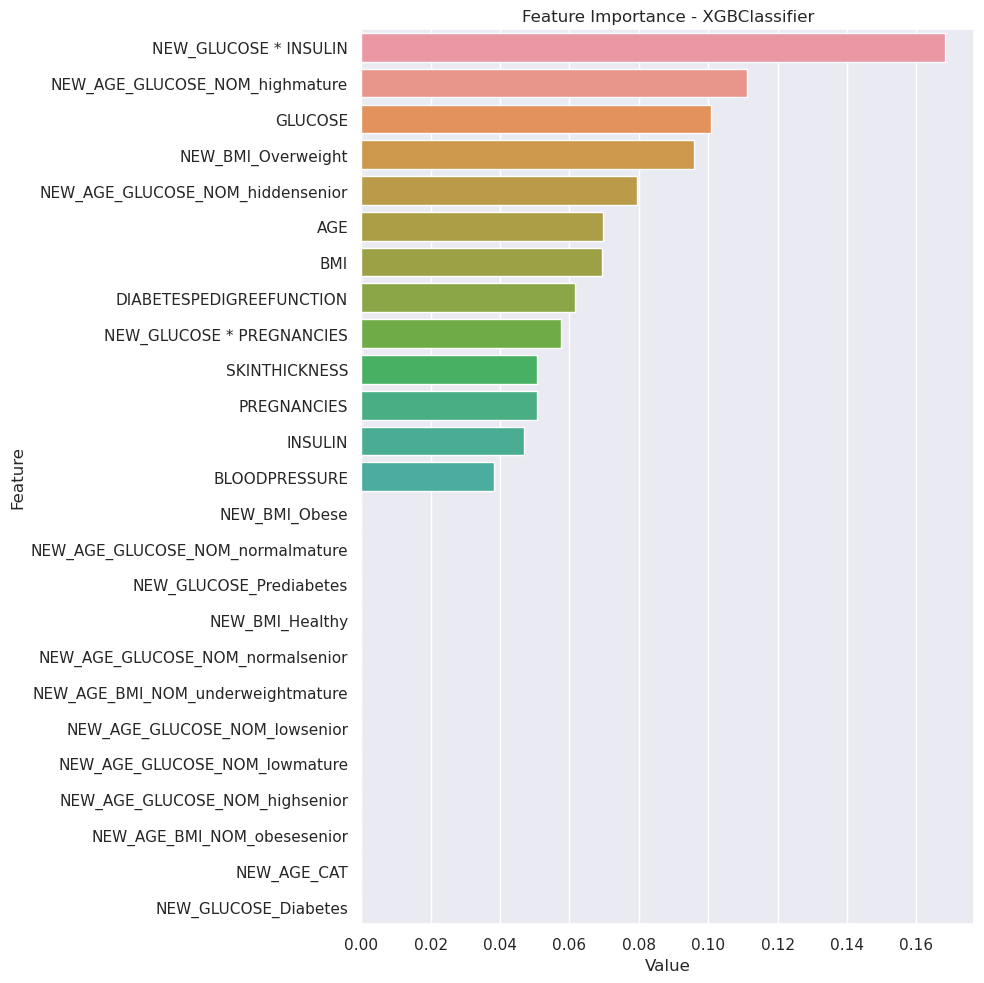

In [124]:
plot_importance(xgb_model, X)

# 20.8.1.XGBoost Classifier Hyperparameter Optimization

In [125]:
xgb_model = XGBClassifier(random_state=46)
parameters = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.1, 0.5, 1.0]}
xgb_grid = GridSearchCV(xgb_model, parameters, cv=5).fit(X_train, y_train)

best_xgb_model = xgb_grid.best_estimator_

print("XGBoost Classifier - Hyperparameter Optimization")
print(f"Best Parameters: {xgb_grid.best_params_}")
print(f"Accuracy: {round(xgb_grid.best_score_, 4)}")
print(f"Recall: {round(recall_score(best_xgb_model.predict(X_test), y_test), 4)}")
print(f"Precision: {round(precision_score(best_xgb_model.predict(X_test), y_test), 4)}")
print(f"F1: {round(f1_score(best_xgb_model.predict(X_test), y_test), 4)}")
print(f"AUC: {round(roc_auc_score(best_xgb_model.predict(X_test), y_test), 4)}")


XGBoost Classifier - Hyperparameter Optimization
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 50}
Accuracy: 0.758
Recall: 0.6835
Precision: 0.6667
F1: 0.675
AUC: 0.753


# 20.9.LightGBM Classifier

In [126]:
lgbm_model = LGBMClassifier(random_state=46).fit(X_train, y_train)

lgbm_pred = lgbm_model.predict(X_test)

print("LightGBM Classifier:")
print(f"Accuracy: {round(accuracy_score(lgbm_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(lgbm_pred, y_test), 4)}")
print(f"Precision: {round(precision_score(lgbm_pred, y_test), 4)}")
print(f"F1: {round(f1_score(lgbm_pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(lgbm_pred, y_test), 4)}")

LightGBM Classifier:
Accuracy: 0.7662
Recall: 0.7015
Precision: 0.5802
F1: 0.6351
AUC: 0.7471


In [127]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title(f'Feature Importance - {model.__class__.__name__}')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig('importances.png')

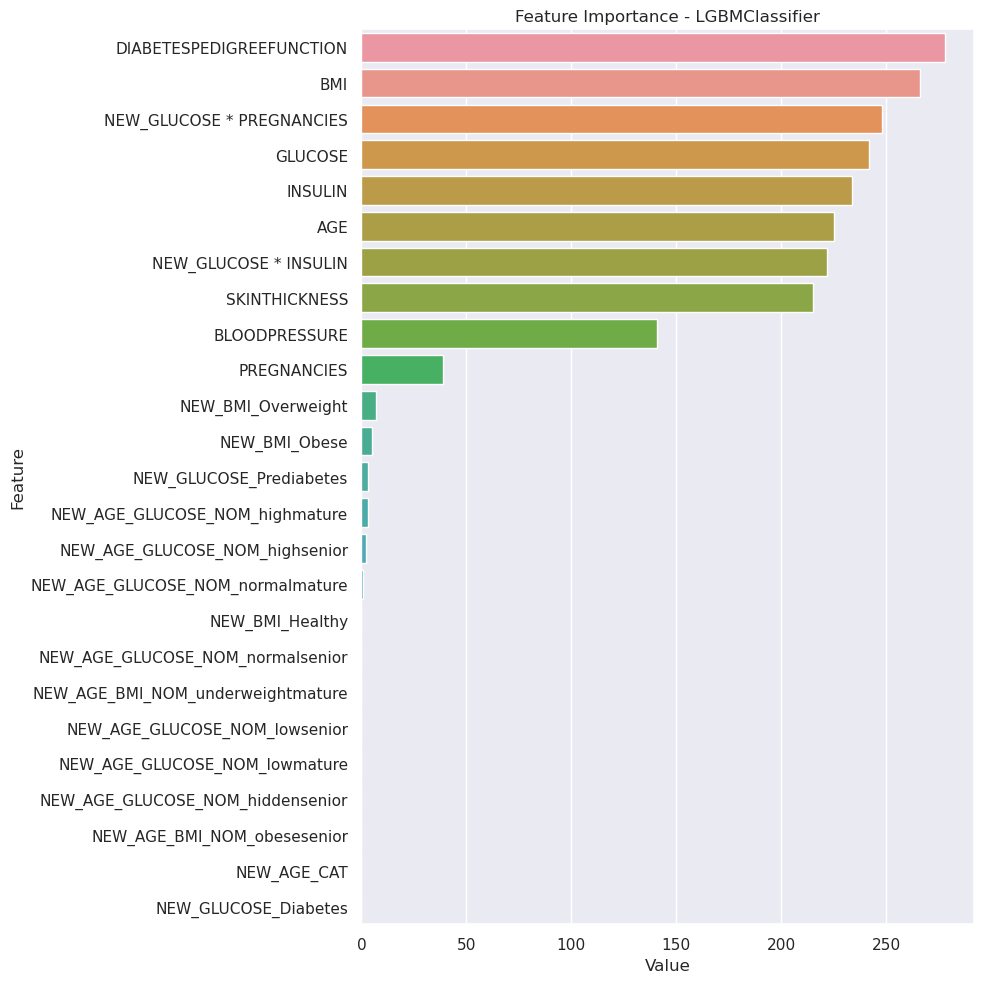

In [128]:
plot_importance(lgbm_model, X)

# 20.9.1.LightGBM Classifier Hyperparameter Optimization

In [129]:

lgbm_model = LGBMClassifier(random_state=46)
parameters = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.1, 0.5, 1.0]}
lgbm_grid = GridSearchCV(lgbm_model, parameters, cv=5).fit(X_train, y_train)

best_lgbm_model = lgbm_grid.best_estimator_

print("LightGBM Classifier - Hyperparameter Optimization")
print(f"Best Parameters: {lgbm_grid.best_params_}")
print(f"Accuracy: {round(lgbm_grid.best_score_, 4)}")
print(f"Recall: {round(recall_score(best_lgbm_model.predict(X_test), y_test), 4)}")
print(f"Precision: {round(precision_score(best_lgbm_model.predict(X_test), y_test), 4)}")
print(f"F1: {round(f1_score(best_lgbm_model.predict(X_test), y_test), 4)}")
print(f"AUC: {round(roc_auc_score(best_lgbm_model.predict(X_test), y_test), 4)}")

LightGBM Classifier - Hyperparameter Optimization
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 50}
Accuracy: 0.7487
Recall: 0.6579
Precision: 0.6173
F1: 0.6369
AUC: 0.7289


# 20.10.Comparison of Metrics for Different Models After Feature Engineering

In [130]:
# Dictionary containing the metric results
metrics = {
    "Model": ["Random Forest", "Logistic Regression", "KNN", "SVC", "Decision Tree", "AdaBoost", "Gradient Boosting", "XGBoost", "LightGBM"],
    "Accuracy": [0.7749, 0.7532, 0.7792, 0.7792, 0.7229, 0.7662, 0.7532, 0.7879, 0.7662],
    "Recall": [0.7101, 0.6875, 0.7027, 0.7419, 0.5955, 0.6957, 0.6667, 0.7105, 0.7015],
    "Precision": [0.6049, 0.5432, 0.642, 0.5679, 0.6543, 0.5926, 0.5926, 0.6667, 0.5802],
    "F1": [0.6533, 0.6069, 0.671, 0.6434, 0.6235, 0.64, 0.6275, 0.6879, 0.6351],
    "AUC": [0.7563, 0.733, 0.759, 0.7674, 0.6992, 0.746, 0.7296, 0.7682, 0.7471]
}

# Creating a DataFrame from the metrics dictionary
results_df = pd.DataFrame(metrics)

# Sorting the DataFrame by accuracy in descending order
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Creating the figure for the graph
fig = go.Figure()

# Colors for the metrics
colors = ["purple", "green", "blue", "orange", "red"]

# Adding traces for each metric in the specified order
for metric, color in zip(["Accuracy", "Recall", "Precision", "F1", "AUC"], colors):
    fig.add_trace(go.Bar(
        x=results_df["Model"],
        y=results_df[metric],
        marker_color=color,
        name=metric,
        text=results_df[metric],
        textposition='auto'
    ))

# Setting axis labels and title
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Metric Score",
    title="Comparison of Metrics for Different Models After Feature Engineering"
)

# Displaying the graph
fig.show(block=True)


# 20.11.Comparison of Metrics for Different Models After Hyperparameter Optimization

In [131]:
# Dictionary containing the metric results
metrics = {
    "Model": ["Random Forest", "Logistic Regression", "KNN", "SVC", "Decision Tree", "AdaBoost", "Gradient Boosting", "XGBoost", "LightGBM"],
    "Accuracy": [0.7749, 0.7654, 0.7487, 0.7691, 0.7188, 0.745, 0.771, 0.758, 0.7487],
    "Recall": [0.6986, 0.6875, 0.6986, 0.7049, 0.618, 0.7, 0.6901, 0.6835, 0.6579],
    "Precision": [0.6296, 0.5432, 0.6296, 0.5309, 0.679, 0.6049, 0.6049, 0.6667, 0.6173],
    "F1": [0.6623, 0.6069, 0.6623, 0.6056, 0.6471, 0.649, 0.6447, 0.675, 0.6369],
    "AUC": [0.7544, 0.733, 0.7544, 0.7407, 0.7174, 0.7506, 0.7451, 0.753, 0.7289]
}

# Creating a DataFrame from the metrics dictionary
results_df = pd.DataFrame(metrics)

# Sorting the DataFrame by accuracy in descending order
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Creating the figure for the graph
fig = go.Figure()

# Colors for the metrics
colors = ["purple", "green", "blue", "orange", "red"]

# Adding traces for each metric in the specified order
for metric, color in zip(["Accuracy", "Recall", "Precision", "F1", "AUC"], colors):
    fig.add_trace(go.Bar(
        x=results_df["Model"],
        y=results_df[metric],
        marker_color=color,
        name=metric,
        text=results_df[metric],
        textposition='auto'
    ))

# Setting axis labels and title
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Metric Score",
    title="Comparison of Metrics for Different Models After Hyperparameter Optimization"
)

# Displaying the graph
fig.show(block=True)


# 20.12.Comparison of Metrics Before and After Hyperparameter Optimization

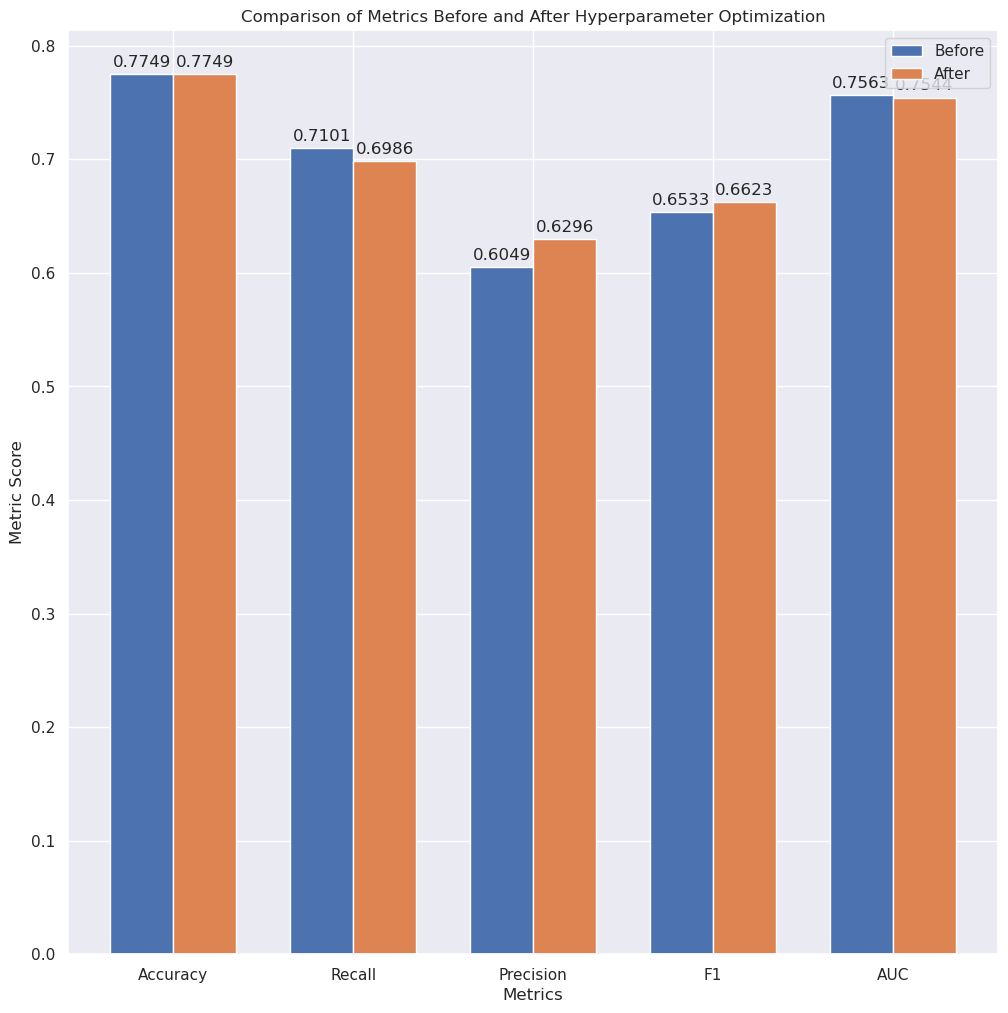

In [132]:
# Metric names
metrics = ["Accuracy", "Recall", "Precision", "F1", "AUC"]

# Metric values before hyperparameter optimization
before_values = [0.7749, 0.7101, 0.6049, 0.6533, 0.7563]

# Metric values after hyperparameter optimization
after_values = [0.7749, 0.6986, 0.6296, 0.6623, 0.7544]

# Index for the x-axis
x = np.arange(len(metrics))

# Width of the bars
width = 0.35

# Creating the figure and axes
fig, ax = plt.subplots()

# Plotting the bars for before values
rects1 = ax.bar(x - width/2, before_values, width, label='Before')

# Plotting the bars for after values
rects2 = ax.bar(x + width/2, after_values, width, label='After')

# Setting labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Metric Score')
ax.set_title('Comparison of Metrics Before and After Hyperparameter Optimization')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Function to attach the metric values on top of the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{round(height, 4)}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords='offset points',
                    ha='center', va='bottom')

# Attaching metric values on top of the bars
autolabel(rects1)
autolabel(rects2)

# Displaying the plot
plt.show()
